In [2]:
# =============================================
# 📁 CELL 1: MOUNT DRIVE & INITIAL SETUP
# =============================================
from google.colab import drive
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive
drive.mount('/content/drive')

print("✅ Google Drive mounted successfully!")
print("✅ All libraries imported")
print("\n🎯 Starting Midas Electronics Data Warehouse Project...")

Mounted at /content/drive
✅ Google Drive mounted successfully!
✅ All libraries imported

🎯 Starting Midas Electronics Data Warehouse Project...


In [3]:
# =============================================
# 📂 CELL 2: LOAD DATA FROM EXCEL FILES
# =============================================
print("="*70)
print("📂 LOADING DATA FROM EXCEL FILES")
print("="*70)

folder_path = '/content/drive/MyDrive/dwm_dataset2/'

# Load all dimension and fact tables
print("\n📥 Loading tables...")
df_customer = pd.read_excel(folder_path + 'DimCustomer.xlsx')
df_date = pd.read_excel(folder_path + 'DimDate.xlsx')
df_product = pd.read_excel(folder_path + 'DimProduct.xlsx')
df_product_group = pd.read_excel(folder_path + 'DimProductGroup.xlsx')
df_sales_channel = pd.read_excel(folder_path + 'DimSalesChannel.xlsx')
df_fact_sales = pd.read_excel(folder_path + 'Midas_Star_Schema.xlsx')

print(f"✅ Customer table: {df_customer.shape}")
print(f"✅ Date table: {df_date.shape}")
print(f"✅ Product table: {df_product.shape}")
print(f"✅ Product Group table: {df_product_group.shape}")
print(f"✅ Sales Channel table: {df_sales_channel.shape}")
print(f"✅ Fact Sales table: {df_fact_sales.shape}")

print(f"\n🎯 Total Fact Sales Records: {len(df_fact_sales)}")

📂 LOADING DATA FROM EXCEL FILES

📥 Loading tables...
✅ Customer table: (10, 11)
✅ Date table: (10, 9)
✅ Product table: (10, 7)
✅ Product Group table: (10, 4)
✅ Sales Channel table: (10, 5)
✅ Fact Sales table: (500, 10)

🎯 Total Fact Sales Records: 500


In [4]:
# =============================================
# 🌐 CELL 3: API DATA INTEGRATION
# =============================================
print("\n" + "="*70)
print("🌐 API DATA INTEGRATION - External Business Intelligence")
print("="*70)

import random
from datetime import datetime

# ==========================================
# API 1: COMPETITOR PRICING DATA
# ==========================================
print("\n📊 API 1: Competitor Pricing Intelligence")

def simulate_competitor_pricing_api():
    """Simulates competitor pricing API"""
    competitors = ['TechMart', 'ElectroHub', 'GadgetWorld']
    competitor_data = []

    # Get our products
    our_products = df_product.head(5)

    for _, product in our_products.iterrows():
        for competitor in competitors:
            competitor_data.append({
                'ProductKey': product['ProductKey'],
                'ProductName': product['ProductName'],
                'Competitor': competitor,
                'CompetitorPrice': random.randint(800, 2500),
                'LastUpdated': datetime.now().strftime('%Y-%m-%d'),
                'InStock': random.choice([True, False])
            })

    return pd.DataFrame(competitor_data)

df_competitor_prices = simulate_competitor_pricing_api()
print(f"✅ Loaded {len(df_competitor_prices)} competitor price records")
print(df_competitor_prices.head())

# ==========================================
# API 2: MARKETING CAMPAIGN DATA
# ==========================================
print("\n📢 API 2: Marketing Campaign Performance")

def simulate_marketing_campaigns_api():
    """Simulates marketing platform API (Google Ads, Facebook, etc.)"""
    campaigns = [
        {
            'CampaignID': 'CAMP001',
            'CampaignName': 'January Electronics Sale',
            'Channel': 'Google Ads',
            'StartDate': '2025-01-01',
            'EndDate': '2025-01-31',
            'Budget': 50000,
            'Impressions': 250000,
            'Clicks': 7500,
            'Conversions': 380,
            'Revenue': 285000,
        },
        {
            'CampaignID': 'CAMP002',
            'CampaignName': 'Facebook Product Launch',
            'Channel': 'Facebook Ads',
            'StartDate': '2025-02-01',
            'EndDate': '2025-02-28',
            'Budget': 35000,
            'Impressions': 180000,
            'Clicks': 5200,
            'Conversions': 210,
            'Revenue': 156000,
        },
        {
            'CampaignID': 'CAMP003',
            'CampaignName': 'March Email Campaign',
            'Channel': 'Email Marketing',
            'StartDate': '2025-03-01',
            'EndDate': '2025-03-31',
            'Budget': 10000,
            'Impressions': 50000,
            'Clicks': 3500,
            'Conversions': 175,
            'Revenue': 89000,
        }
    ]

    df = pd.DataFrame(campaigns)
    df['ROI'] = ((df['Revenue'] - df['Budget']) / df['Budget'] * 100).round(2)
    df['CTR'] = (df['Clicks'] / df['Impressions'] * 100).round(2)
    df['ConversionRate'] = (df['Conversions'] / df['Clicks'] * 100).round(2)

    return df

df_marketing_campaigns = simulate_marketing_campaigns_api()
print(f"✅ Loaded {len(df_marketing_campaigns)} marketing campaigns")
print(df_marketing_campaigns[['CampaignName', 'Budget', 'Revenue', 'ROI']])

# ==========================================
# API 3: CUSTOMER REVIEW & SENTIMENT DATA
# ==========================================
print("\n⭐ API 3: Customer Reviews & Sentiment Analysis")

def simulate_customer_reviews_api():
    """Simulates product review aggregation API"""
    reviews_data = []

    for _, product in df_product.iterrows():
        reviews_data.append({
            'ProductKey': product['ProductKey'],
            'ProductName': product['ProductName'],
            'AvgRating': round(random.uniform(3.5, 4.9), 2),
            'TotalReviews': random.randint(50, 500),
            'PositiveReviews': random.randint(40, 450),
            'NegativeReviews': random.randint(5, 50),
            'SentimentScore': round(random.uniform(0.6, 0.95), 2),
        })

    return pd.DataFrame(reviews_data)

df_product_reviews = simulate_customer_reviews_api()
print(f"✅ Loaded {len(df_product_reviews)} product review records")
print(df_product_reviews[['ProductName', 'AvgRating', 'TotalReviews']].head())

print("\n✅ All API data loaded successfully!")
print("📡 Note: In production, these would be real API calls with authentication")


🌐 API DATA INTEGRATION - External Business Intelligence

📊 API 1: Competitor Pricing Intelligence
✅ Loaded 15 competitor price records
   ProductKey           ProductName   Competitor  CompetitorPrice LastUpdated  \
0           1       Toaster 2-Slice     TechMart             1732  2025-11-13   
1           1       Toaster 2-Slice   ElectroHub             2328  2025-11-13   
2           1       Toaster 2-Slice  GadgetWorld             2070  2025-11-13   
3           2  Electric Kettle 1.7L     TechMart             2259  2025-11-13   
4           2  Electric Kettle 1.7L   ElectroHub             1636  2025-11-13   

   InStock  
0     True  
1     True  
2     True  
3     True  
4     True  

📢 API 2: Marketing Campaign Performance
✅ Loaded 3 marketing campaigns
               CampaignName  Budget  Revenue     ROI
0  January Electronics Sale   50000   285000  470.00
1   Facebook Product Launch   35000   156000  345.71
2      March Email Campaign   10000    89000  790.00

⭐ API 3: Custo

In [5]:
# =============================================
# 🔍 CELL 4: DATA QUALITY CHECKS
# =============================================
print("\n" + "="*70)
print("🔍 DATA QUALITY & INTEGRITY CHECKS")
print("="*70)

def check_data_quality(df, name):
    """Check data quality for each table"""
    print(f"\n--- {name} ---")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(f"Missing values:\n{df.isnull().sum()}")
    print(f"Duplicates: {df.duplicated().sum()}")

# Check all tables
check_data_quality(df_customer, "Customer")
check_data_quality(df_date, "Date")
check_data_quality(df_product, "Product")
check_data_quality(df_product_group, "Product Group")
check_data_quality(df_sales_channel, "Sales Channel")
check_data_quality(df_fact_sales, "Fact Sales")

# ==========================================
# CHECK REFERENTIAL INTEGRITY
# ==========================================
print("\n" + "="*70)
print("🔗 CHECKING REFERENTIAL INTEGRITY (Foreign Keys)")
print("="*70)

def check_referential_integrity(fact_df, dim_df, fact_key, dim_key):
    """Check if all keys in fact table exist in dimension table"""
    missing_keys = set(fact_df[fact_key]) - set(dim_df[dim_key])
    if missing_keys:
        print(f"⚠️  {len(missing_keys)} keys in fact table not found in {dim_key}")
        return len(missing_keys)
    else:
        print(f"✅ All {dim_key} match between fact and dimension table")
        return 0

missing_customers = check_referential_integrity(df_fact_sales, df_customer, 'CustomerKey', 'CustomerKey')
missing_products = check_referential_integrity(df_fact_sales, df_product, 'ProductKey', 'ProductKey')
missing_dates = check_referential_integrity(df_fact_sales, df_date, 'DateKey', 'DateKey')
check_referential_integrity(df_fact_sales, df_product_group, 'ProductGroupKey', 'ProductGroupKey')
check_referential_integrity(df_fact_sales, df_sales_channel, 'ChannelKey', 'ChannelKey')

print(f"\n📊 Summary: {missing_customers} missing customers, {missing_products} missing products, {missing_dates} missing dates")


🔍 DATA QUALITY & INTEGRITY CHECKS

--- Customer ---
Shape: (10, 11)
Columns: ['CustomerKey', 'CustomerID', 'FullName', 'Email', 'Phone', 'City', 'State', 'Country', 'JoinDate', 'DataQualityStatus', 'IsActive']
Missing values:
CustomerKey          0
CustomerID           0
FullName             0
Email                0
Phone                0
City                 0
State                0
Country              0
JoinDate             0
DataQualityStatus    0
IsActive             0
dtype: int64
Duplicates: 0

--- Date ---
Shape: (10, 9)
Columns: ['DateKey', 'Date', 'Year', 'Quarter', 'Month', 'MonthName', 'DayOfMonth', 'DayOfWeek', 'IsWeekend']
Missing values:
DateKey       0
Date          0
Year          0
Quarter       0
Month         0
MonthName     0
DayOfMonth    0
DayOfWeek     0
IsWeekend     0
dtype: int64
Duplicates: 0

--- Product ---
Shape: (10, 7)
Columns: ['ProductKey', 'ProductID', 'ProductName', 'Model', 'Brand', 'WarrantyMonths', 'ProductGroupKey']
Missing values:
ProductKey  

In [6]:
# =============================================
# 🔧 CELL 5: HANDLE MISSING KEYS & EXPAND DIMENSIONS
# =============================================
print("\n" + "="*70)
print("🔧 EXPANDING DIMENSION TABLES TO HANDLE MISSING KEYS")
print("="*70)

# ==========================================
# EXPAND CUSTOMER DIMENSION
# ==========================================
print("\n👥 Expanding Customer Dimension...")

all_customer_keys = set(df_fact_sales['CustomerKey'])
existing_customer_keys = set(df_customer['CustomerKey'])
missing_customer_keys = all_customer_keys - existing_customer_keys

print(f"Need: {len(all_customer_keys)}, Have: {len(existing_customer_keys)}, Missing: {len(missing_customer_keys)}")

unknown_customers = []
for key in missing_customer_keys:
    unknown_customers.append({
        'CustomerKey': key,
        'CustomerID': 1000000 + key,
        'FullName': f'Unknown Customer {key}',
        'Email': f'unknown{key}@example.com',
        'Phone': f'0300-000{key}',
        'City': 'Unknown City',
        'State': 'Unknown State',
        'Country': 'Pakistan',
        'JoinDate': '2023-01-01',
        'DataQualityStatus': 'Unknown',
        'IsActive': True
    })

df_customer = pd.concat([df_customer, pd.DataFrame(unknown_customers)], ignore_index=True)
print(f"✅ Customer dimension expanded to {len(df_customer)} rows")

# ==========================================
# EXPAND PRODUCT DIMENSION
# ==========================================
print("\n📦 Expanding Product Dimension...")

all_product_keys = set(df_fact_sales['ProductKey'])
existing_product_keys = set(df_product['ProductKey'])
missing_product_keys = all_product_keys - existing_product_keys

print(f"Need: {len(all_product_keys)}, Have: {len(existing_product_keys)}, Missing: {len(missing_product_keys)}")

unknown_products = []
for key in missing_product_keys:
    unknown_products.append({
        'ProductKey': key,
        'ProductID': 100 + key,
        'ProductName': f'Unknown Product {key}',
        'Model': f'UNK-{key}',
        'Brand': 'Unknown Brand',
        'WarrantyMonths': 12,
        'ProductGroupKey': 1
    })

df_product = pd.concat([df_product, pd.DataFrame(unknown_products)], ignore_index=True)
print(f"✅ Product dimension expanded to {len(df_product)} rows")

# ==========================================
# EXPAND DATE DIMENSION
# ==========================================
print("\n📅 Expanding Date Dimension...")

all_date_keys = set(df_fact_sales['DateKey'])
existing_date_keys = set(df_date['DateKey'])
missing_date_keys = all_date_keys - existing_date_keys

print(f"Need: {len(all_date_keys)}, Have: {len(existing_date_keys)}, Missing: {len(missing_date_keys)}")

unknown_dates = []
for key in missing_date_keys:
    date_str = str(key)
    year = int(date_str[:4])
    month = int(date_str[4:6])
    day = int(date_str[6:8])

    unknown_dates.append({
        'DateKey': key,
        'Date': f"{month}/{day}/{year}",
        'Year': year,
        'Quarter': f"Q{(month-1)//3 + 1}",
        'Month': month,
        'MonthName': ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'][month-1],
        'DayOfMonth': day,
        'DayOfWeek': 'Unknown',
        'IsWeekend': False
    })

df_date = pd.concat([df_date, pd.DataFrame(unknown_dates)], ignore_index=True)
print(f"✅ Date dimension expanded to {len(df_date)} rows")

print("\n✅ All dimension tables expanded successfully!")


🔧 EXPANDING DIMENSION TABLES TO HANDLE MISSING KEYS

👥 Expanding Customer Dimension...
Need: 50, Have: 10, Missing: 40
✅ Customer dimension expanded to 50 rows

📦 Expanding Product Dimension...
Need: 12, Have: 10, Missing: 2
✅ Product dimension expanded to 12 rows

📅 Expanding Date Dimension...
Need: 89, Have: 10, Missing: 79
✅ Date dimension expanded to 89 rows

✅ All dimension tables expanded successfully!


In [7]:
# =============================================
# 🗄️ CELL 6: CREATE STAR SCHEMA & LOAD INTO SQLite
# =============================================
print("\n" + "="*70)
print("🗄️ CREATING DATA WAREHOUSE WITH STAR SCHEMA")
print("="*70)

# Create SQLite database
conn = sqlite3.connect('midas_data_warehouse.db')

print("\n💾 Loading tables into SQLite database...")

# Convert date columns to strings to avoid type issues
if 'JoinDate' in df_customer.columns:
    df_customer['JoinDate'] = df_customer['JoinDate'].astype(str)
if 'Date' in df_date.columns:
    df_date['Date'] = df_date['Date'].astype(str)

# Load all tables
df_customer.to_sql('dim_customer', conn, if_exists='replace', index=False)
df_date.to_sql('dim_date', conn, if_exists='replace', index=False)
df_product.to_sql('dim_product', conn, if_exists='replace', index=False)
df_product_group.to_sql('dim_product_group', conn, if_exists='replace', index=False)
df_sales_channel.to_sql('dim_sales_channel', conn, if_exists='replace', index=False)
df_fact_sales.to_sql('fact_sales', conn, if_exists='replace', index=False)

# Load API data as additional dimension tables
df_competitor_prices.to_sql('dim_competitor_pricing', conn, if_exists='replace', index=False)
df_marketing_campaigns.to_sql('dim_marketing_campaigns', conn, if_exists='replace', index=False)
df_product_reviews.to_sql('dim_product_reviews', conn, if_exists='replace', index=False)

print("✅ All tables loaded successfully!")

# Verify
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;", conn)
print(f"\n📊 Total tables in database: {len(tables)}")
for table in tables['name']:
    count = pd.read_sql(f"SELECT COUNT(*) as count FROM {table}", conn)['count'].iloc[0]
    print(f"   • {table}: {count} rows")

# Verify fact table
fact_count = pd.read_sql("SELECT COUNT(*) FROM fact_sales", conn).iloc[0,0]
print(f"\n🎯 Fact Sales: {fact_count} records (Should be 500)")

if fact_count == 500:
    print("✅ SUCCESS! Data warehouse created with complete data!")
else:
    print(f"⚠️  Warning: Expected 500 records, got {fact_count}")

# Save to Drive
import shutil
shutil.copy('midas_data_warehouse.db', '/content/drive/MyDrive/dwm_dataset2/midas_data_warehouse.db')
print("\n💾 Database saved to Google Drive!")


🗄️ CREATING DATA WAREHOUSE WITH STAR SCHEMA

💾 Loading tables into SQLite database...
✅ All tables loaded successfully!

📊 Total tables in database: 9
   • dim_competitor_pricing: 15 rows
   • dim_customer: 50 rows
   • dim_date: 89 rows
   • dim_marketing_campaigns: 3 rows
   • dim_product: 12 rows
   • dim_product_group: 10 rows
   • dim_product_reviews: 10 rows
   • dim_sales_channel: 10 rows
   • fact_sales: 500 rows

🎯 Fact Sales: 500 records (Should be 500)
✅ SUCCESS! Data warehouse created with complete data!

💾 Database saved to Google Drive!



📊 CREATING STAR SCHEMA VISUALIZATION
✅ Star schema visualization created!


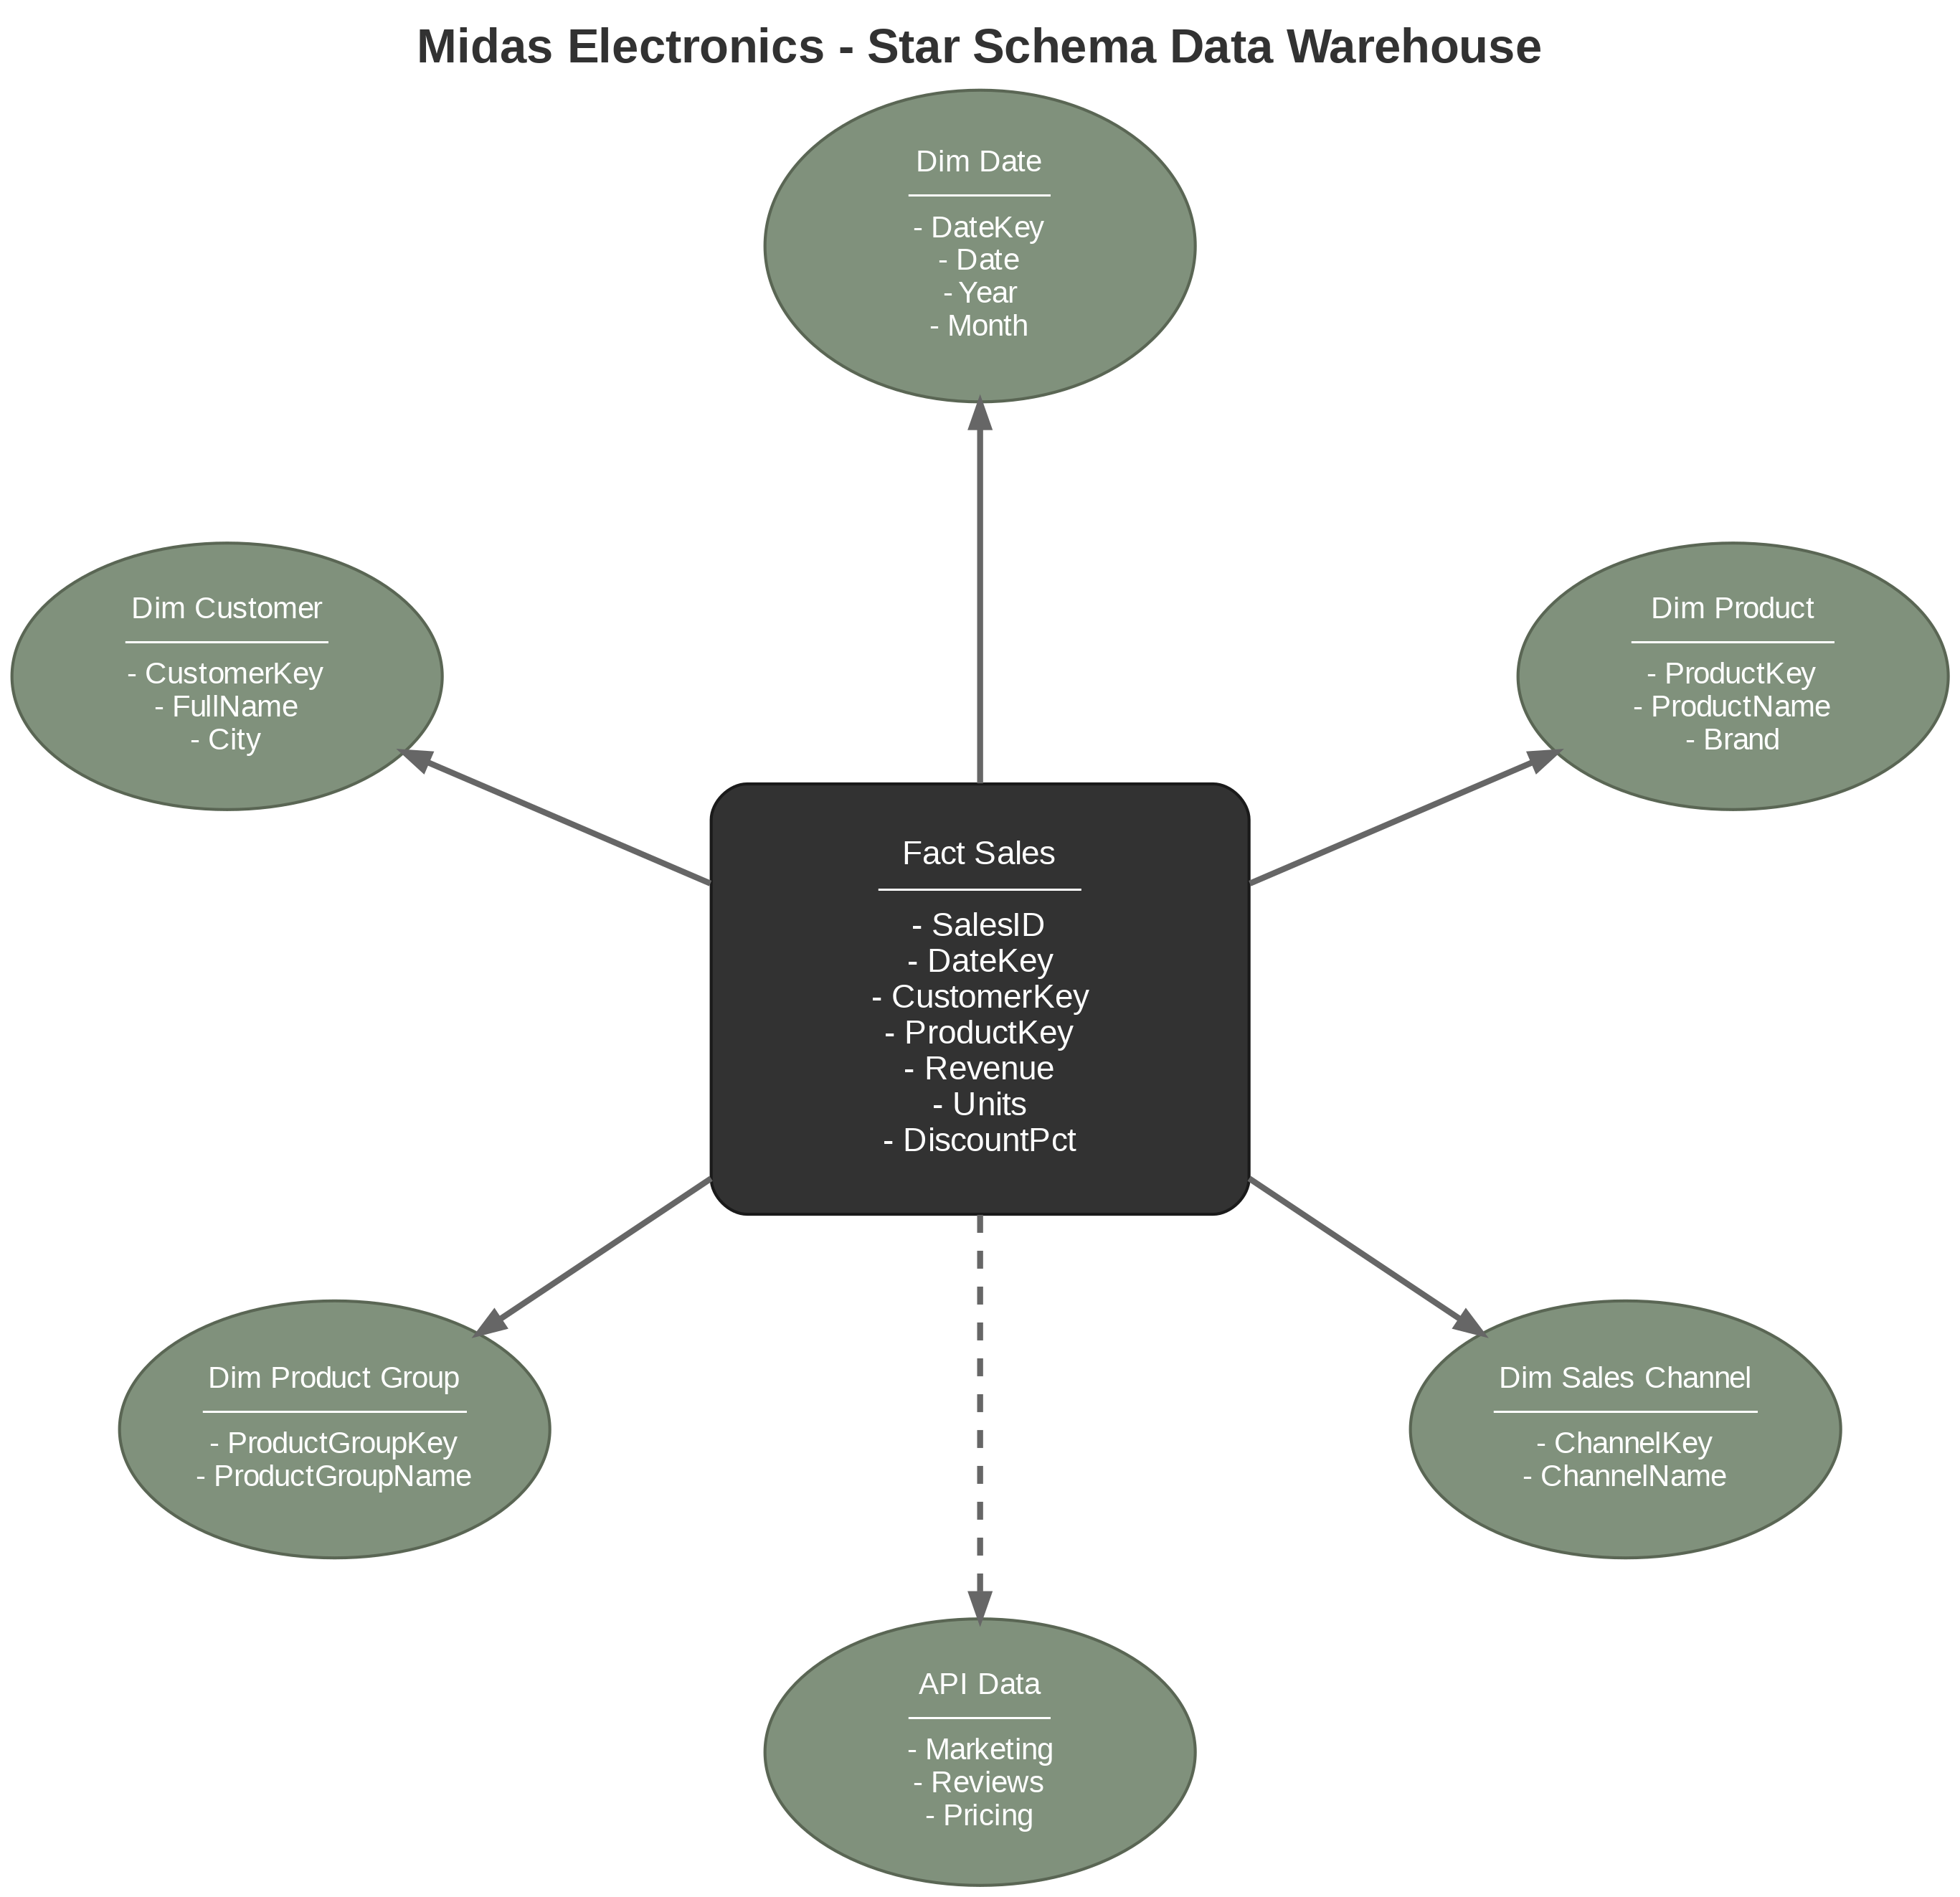

In [8]:
# =============================================
# 📊 CELL 7: VISUALIZE STAR SCHEMA DESIGN
# =============================================
print("\n" + "="*70)
print("📊 CREATING STAR SCHEMA VISUALIZATION")
print("="*70)

from graphviz import Digraph
from IPython.display import Image

# Create graph
dot = Digraph('StarSchema', format='png')
dot.attr(rankdir='TB', size='10,10', dpi='300', bgcolor='white', layout='neato')

# Styles
fact_style = {
    'shape': 'box',
    'style': 'filled,rounded',
    'fillcolor': '#323232',
    'color': '#1A1A1A',
    'fontname': 'Arial',
    'fontsize': '11',
    'fontcolor': 'white',
    'width': '2.5',
    'height': '2'
}

dim_style = {
    'shape': 'ellipse',
    'style': 'filled',
    'fillcolor': '#80917C',
    'color': '#5A6654',
    'fontname': 'Arial',
    'fontsize': '10',
    'fontcolor': 'white',
    'width': '2',
    'height': '1.2'
}

edge_style = {
    'color': '#666666',
    'arrowsize': '0.8',
    'penwidth': '2'
}

# Fact table (center)
dot.node('FactSales', '''Fact Sales
─────────
- SalesID
- DateKey
- CustomerKey
- ProductKey
- Revenue
- Units
- DiscountPct''', **fact_style, pos='0,0!')

# Dimension tables (arranged in circle)
dot.node('DimDate', f'''Dim Date
───────
- DateKey
- Date
- Year
- Month''', **dim_style, pos='0,3.5!')

dot.node('DimCustomer', f'''Dim Customer
──────────
- CustomerKey
- FullName
- City''', **dim_style, pos='-3.5,1.5!')

dot.node('DimProduct', f'''Dim Product
──────────
- ProductKey
- ProductName
- Brand''', **dim_style, pos='3.5,1.5!')

dot.node('DimProductGroup', f'''Dim Product Group
─────────────
- ProductGroupKey
- ProductGroupName''', **dim_style, pos='-3,-2!')

dot.node('DimSalesChannel', f'''Dim Sales Channel
─────────────
- ChannelKey
- ChannelName''', **dim_style, pos='3,-2!')

dot.node('DimAPI', '''API Data
───────
- Marketing
- Reviews
- Pricing''', **dim_style, pos='0,-3.5!')

# Create relationships
dot.edge('FactSales', 'DimDate', **edge_style)
dot.edge('FactSales', 'DimCustomer', **edge_style)
dot.edge('FactSales', 'DimProduct', **edge_style)
dot.edge('FactSales', 'DimProductGroup', **edge_style)
dot.edge('FactSales', 'DimSalesChannel', **edge_style)
dot.edge('FactSales', 'DimAPI', **edge_style, style='dashed')

# Add title
dot.attr(label='Midas Electronics - Star Schema Data Warehouse',
         labelloc='t', fontsize='16', fontname='Arial Bold', fontcolor='#323232')

# Render
dot.render('star_schema', cleanup=True)
print("✅ Star schema visualization created!")

# Display
Image('star_schema.png', width=700, height=700)

In [9]:
# =============================================
# 📊 CELL 8: SQL ANALYTICAL QUERIES
# =============================================
print("\n" + "="*70)
print("📊 RUNNING ANALYTICAL SQL QUERIES")
print("="*70)

# Query 1: Monthly Revenue
print("\n💰 Query 1: Monthly Revenue Trend")
monthly_revenue = pd.read_sql("""
    SELECT
        d.MonthName,
        d.Month,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue,
        COUNT(f.SalesID) as TotalSales,
        AVG(CAST(f.Revenue AS FLOAT)) as AvgTransactionValue
    FROM fact_sales f
    JOIN dim_date d ON f.DateKey = d.DateKey
    GROUP BY d.MonthName, d.Month
    ORDER BY d.Month
""", conn)
print(monthly_revenue)

# Query 2: Top Products
print("\n🏆 Query 2: Top 10 Products by Revenue")
top_products = pd.read_sql("""
    SELECT
        p.ProductName,
        p.Brand,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue,
        COUNT(f.SalesID) as UnitsSold
    FROM fact_sales f
    JOIN dim_product p ON f.ProductKey = p.ProductKey
    GROUP BY p.ProductName, p.Brand
    ORDER BY TotalRevenue DESC
    LIMIT 10
""", conn)
print(top_products)

# Query 3: Channel Performance
print("\n📈 Query 3: Sales Channel Performance")
channel_performance = pd.read_sql("""
    SELECT
        s.ChannelName,
        s.ChannelType,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue,
        COUNT(f.SalesID) as TotalSales,
        AVG(CAST(f.Revenue AS FLOAT)) as AvgSaleValue
    FROM fact_sales f
    JOIN dim_sales_channel s ON f.ChannelKey = s.ChannelKey
    GROUP BY s.ChannelName, s.ChannelType
    ORDER BY TotalRevenue DESC
""", conn)
print(channel_performance)

# Query 4: Brand Performance
print("\n🏷️ Query 4: Brand Performance Analysis")
brand_performance = pd.read_sql("""
    SELECT
        p.Brand,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue,
        COUNT(f.SalesID) as TotalSales,
        AVG(CAST(f.Revenue AS FLOAT)) as AvgRevenue
    FROM fact_sales f
    JOIN dim_product p ON f.ProductKey = p.ProductKey
    GROUP BY p.Brand
    ORDER BY TotalRevenue DESC
""", conn)
print(brand_performance)

# Query 5: Return Rate Analysis
print("\n🔄 Query 5: Product Return Rate")
return_analysis = pd.read_sql("""
    SELECT
        SUM(CAST(ReturnedFlag AS INT)) as TotalReturns,
        COUNT(*) as TotalSales,
        ROUND(SUM(CAST(ReturnedFlag AS INT)) * 100.0 / COUNT(*), 2) as ReturnRatePct
    FROM fact_sales
""", conn)
print(return_analysis)

print("\n✅ All analytical queries completed!")


📊 RUNNING ANALYTICAL SQL QUERIES

💰 Query 1: Monthly Revenue Trend
  MonthName  Month  TotalRevenue  TotalSales  AvgTransactionValue
0       Jan      1     133842.59         154           869.107727
1       Feb      2     134236.68         168           799.027857
2       Mar      3     149903.30         178           842.153371

🏆 Query 2: Top 10 Products by Revenue
           ProductName            Brand  TotalRevenue  UnitsSold
0  Washing Machine 7kg         MidasPro      42917.69         49
1   Unknown Product 11    Unknown Brand      42157.35         47
2           LED TV 55"         MidasPro      39830.52         43
3   Unknown Product 12    Unknown Brand      38420.58         52
4     Home Theater 5.1        MidasHome      38220.50         43
5      Ceiling Fan 56"        MidasHome      37547.75         42
6       Set-Top Box 4K  MidasEssentials      37394.83         43
7      Toaster 2-Slice        MidasHome      31344.77         34
8           LED TV 43"  MidasEssentials     


📊 OLAP OPERATIONS - Multidimensional Analysis

🔽 DRILL-DOWN OPERATION
Navigating from Year → Month → Daily level

📅 Level 1: Yearly Revenue (Highest Level)
   Year  TotalRevenue  TotalSales
0  2025     417982.57         500

📅 Level 2: Monthly Revenue (Drilled Down)
   Year  Month MonthName  TotalRevenue  TotalSales
0  2025      1       Jan     133842.59         154
1  2025      2       Feb     134236.68         168
2  2025      3       Mar     149903.30         178

📅 Level 3: Daily Sales for January 2025 (Deepest Level)
        Date  TotalRevenue  TotalSales
0  1/11/2025       2985.63           5
1  1/12/2025       4066.65           8
2  1/13/2025        393.01           2
3  1/14/2025       3479.80           5
4  1/15/2025        952.34           1
5  1/16/2025       2198.59           4
6  1/17/2025       5899.58           8
7  1/18/2025       3613.81           6
8  1/19/2025       7014.64           5
9  1/20/2025       7227.76           8


🔼 ROLL-UP OPERATION
Aggregating from Pro

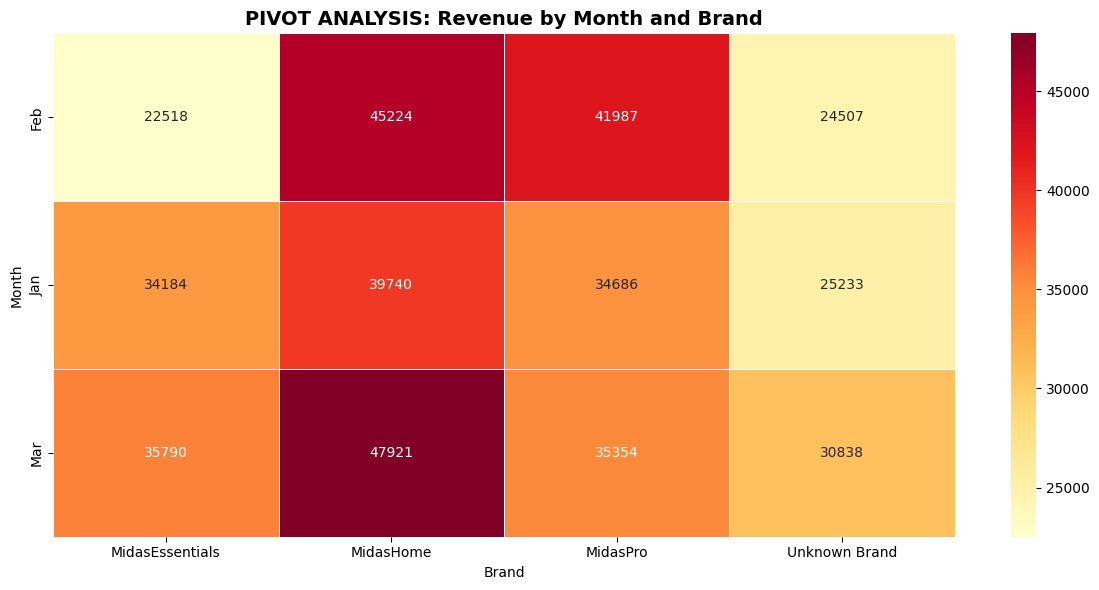


✅ All OLAP Operations Completed Successfully!


In [10]:
# =============================================
# 📊 CELL 9: OLAP OPERATIONS (ROLAP Implementation)
# =============================================
print("\n" + "="*70)
print("📊 OLAP OPERATIONS - Multidimensional Analysis")
print("="*70)

# ==========================================
# 1. DRILL-DOWN: Year → Month → Day
# ==========================================
print("\n🔽 DRILL-DOWN OPERATION")
print("="*50)
print("Navigating from Year → Month → Daily level")

# Level 1: Yearly
print("\n📅 Level 1: Yearly Revenue (Highest Level)")
yearly = pd.read_sql("""
    SELECT
        d.Year,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue,
        COUNT(f.SalesID) as TotalSales
    FROM fact_sales f
    JOIN dim_date d ON f.DateKey = d.DateKey
    GROUP BY d.Year
    ORDER BY d.Year
""", conn)
print(yearly)

# Level 2: Monthly (Drill Down)
print("\n📅 Level 2: Monthly Revenue (Drilled Down)")
monthly = pd.read_sql("""
    SELECT
        d.Year,
        d.Month,
        d.MonthName,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue,
        COUNT(f.SalesID) as TotalSales
    FROM fact_sales f
    JOIN dim_date d ON f.DateKey = d.DateKey
    GROUP BY d.Year, d.Month, d.MonthName
    ORDER BY d.Year, d.Month
""", conn)
print(monthly)

# Level 3: Daily (Deepest Drill)
print("\n📅 Level 3: Daily Sales for January 2025 (Deepest Level)")
daily = pd.read_sql("""
    SELECT
        d.Date,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue,
        COUNT(f.SalesID) as TotalSales
    FROM fact_sales f
    JOIN dim_date d ON f.DateKey = d.DateKey
    WHERE d.Month = 1 AND d.Year = 2025
    GROUP BY d.Date
    ORDER BY d.Date
    LIMIT 10
""", conn)
print(daily)

# ==========================================
# 2. ROLL-UP: Product → Brand → Category
# ==========================================
print("\n\n🔼 ROLL-UP OPERATION")
print("="*50)
print("Aggregating from Product → Brand → Category")

# Level 1: Product Level (Most Detailed)
print("\n📦 Level 1: Product-Level Sales (Most Detailed)")
product_level = pd.read_sql("""
    SELECT
        p.ProductName,
        p.Brand,
        pg.ProductGroupName,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue
    FROM fact_sales f
    JOIN dim_product p ON f.ProductKey = p.ProductKey
    JOIN dim_product_group pg ON p.ProductGroupKey = pg.ProductGroupKey
    GROUP BY p.ProductName, p.Brand, pg.ProductGroupName
    ORDER BY TotalRevenue DESC
    LIMIT 5
""", conn)
print(product_level)

# Level 2: Brand Level (Rolled Up)
print("\n🏷️ Level 2: Brand-Level Sales (Rolled Up)")
brand_level = pd.read_sql("""
    SELECT
        p.Brand,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue,
        COUNT(DISTINCT p.ProductKey) as NumberOfProducts
    FROM fact_sales f
    JOIN dim_product p ON f.ProductKey = p.ProductKey
    GROUP BY p.Brand
    ORDER BY TotalRevenue DESC
""", conn)
print(brand_level)

# Level 3: Category Level (Highest Aggregation)
print("\n📊 Level 3: Category-Level Sales (Highest Aggregation)")
category_level = pd.read_sql("""
    SELECT
        pg.ProductGroupName,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue,
        COUNT(f.SalesID) as TotalSales
    FROM fact_sales f
    JOIN dim_product_group pg ON f.ProductGroupKey = pg.ProductGroupKey
    GROUP BY pg.ProductGroupName
    ORDER BY TotalRevenue DESC
""", conn)
print(category_level)

# ==========================================
# 3. SLICE: Filter by One Dimension
# ==========================================
print("\n\n🔪 SLICE OPERATION")
print("="*50)
print("Filtering by Single Dimension: 'Direct – Field' Channel Only")

slice_result = pd.read_sql("""
    SELECT
        p.ProductName,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue,
        COUNT(f.SalesID) as TotalSales
    FROM fact_sales f
    JOIN dim_product p ON f.ProductKey = p.ProductKey
    JOIN dim_sales_channel s ON f.ChannelKey = s.ChannelKey
    WHERE s.ChannelName = 'Direct – Field'
    GROUP BY p.ProductName
    ORDER BY TotalRevenue DESC
    LIMIT 5
""", conn)
print(slice_result)

# ==========================================
# 4. DICE: Filter by Multiple Dimensions
# ==========================================
print("\n\n🎲 DICE OPERATION")
print("="*50)
print("Multi-Dimensional Filter: MidasPro + January 2025 + Direct Field")

dice_result = pd.read_sql("""
    SELECT
        p.ProductName,
        d.MonthName,
        s.ChannelName,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue,
        COUNT(f.SalesID) as TotalSales
    FROM fact_sales f
    JOIN dim_product p ON f.ProductKey = p.ProductKey
    JOIN dim_date d ON f.DateKey = d.DateKey
    JOIN dim_sales_channel s ON f.ChannelKey = s.ChannelKey
    WHERE p.Brand = 'MidasPro'
        AND d.Month = 1
        AND d.Year = 2025
        AND s.ChannelName = 'Direct – Field'
    GROUP BY p.ProductName, d.MonthName, s.ChannelName
    ORDER BY TotalRevenue DESC
""", conn)
print(dice_result)

# ==========================================
# 5. PIVOT: Cross-Tabulation Analysis
# ==========================================
print("\n\n🔄 PIVOT OPERATION")
print("="*50)
print("Creating Month vs Brand Revenue Matrix")

pivot_data = pd.read_sql("""
    SELECT
        d.MonthName,
        d.Month,
        p.Brand,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue
    FROM fact_sales f
    JOIN dim_product p ON f.ProductKey = p.ProductKey
    JOIN dim_date d ON f.DateKey = d.DateKey
    GROUP BY d.MonthName, d.Month, p.Brand
    ORDER BY d.Month, p.Brand
""", conn)

# Create pivot table
pivot_table = pivot_data.pivot(index='MonthName', columns='Brand', values='TotalRevenue')
pivot_table = pivot_table.fillna(0)
print("\n📊 Revenue by Month and Brand:")
print(pivot_table)

# Visualize Pivot
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5)
plt.title('PIVOT ANALYSIS: Revenue by Month and Brand', fontsize=14, fontweight='bold')
plt.xlabel('Brand')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

print("\n✅ All OLAP Operations Completed Successfully!")


🤖 MACHINE LEARNING - CUSTOMER SEGMENTATION (K-Means Clustering)
📊 Analyzing 50 customers...

✅ CUSTOMER SEGMENTS CREATED:
   • Regular Customers: 25 customers
   • Budget Shoppers: 13 customers
   • VIP Customers: 12 customers

📈 SEGMENT CHARACTERISTICS:

   Budget Shoppers:
      • Avg Total Spent: $11,004.04
      • Avg Purchases: 14.1
      • Avg Purchase Value: $785.95

   Regular Customers:
      • Avg Total Spent: $6,433.98
      • Avg Purchases: 8.5
      • Avg Purchase Value: $775.97

   VIP Customers:
      • Avg Total Spent: $9,506.72
      • Avg Purchases: 8.7
      • Avg Purchase Value: $1103.73


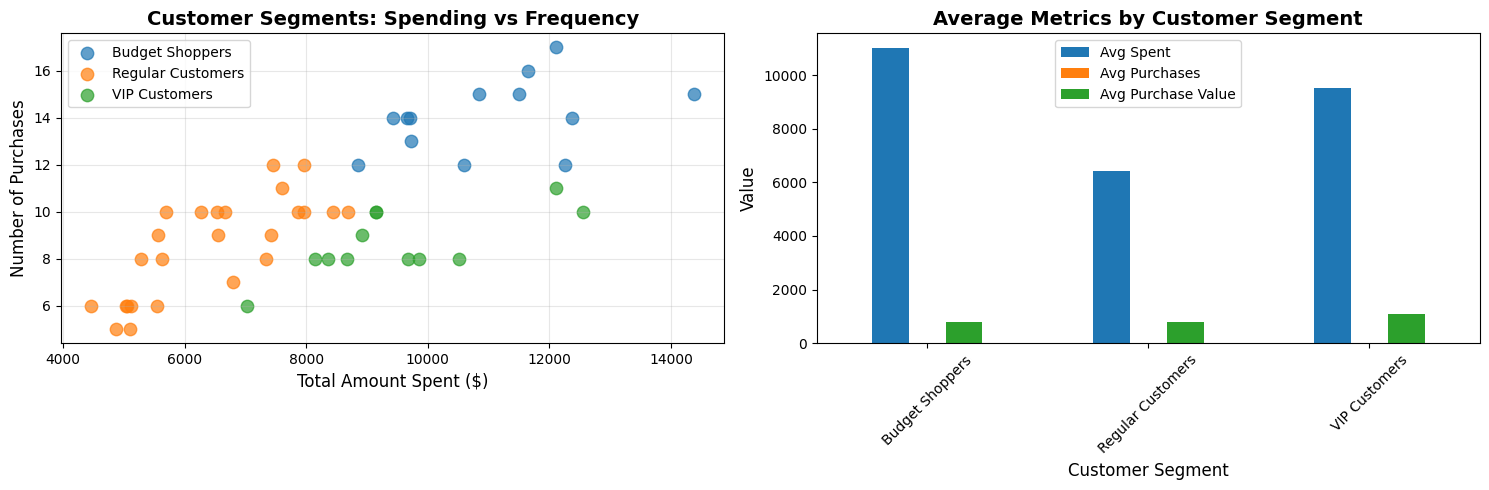


✅ Customer Segmentation Complete!


In [11]:
# =============================================
# 🤖 CELL 10: MACHINE LEARNING - Customer Segmentation
# =============================================
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

print("\n" + "="*70)
print("🤖 MACHINE LEARNING - CUSTOMER SEGMENTATION (K-Means Clustering)")
print("="*70)

# Get customer behavior data
customer_behavior = pd.read_sql("""
    SELECT
        c.CustomerKey,
        c.FullName,
        c.City,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalSpent,
        COUNT(f.SalesID) as PurchaseCount,
        AVG(CAST(f.Revenue AS FLOAT)) as AvgPurchaseValue,
        SUM(CAST(f.Units AS INT)) as TotalUnits,
        AVG(CAST(f.DiscountPct AS FLOAT)) as AvgDiscountUsed
    FROM fact_sales f
    JOIN dim_customer c ON f.CustomerKey = c.CustomerKey
    GROUP BY c.CustomerKey, c.FullName, c.City
""", conn)

print(f"📊 Analyzing {len(customer_behavior)} customers...")

# Prepare features for clustering
features = customer_behavior[['TotalSpent', 'PurchaseCount', 'AvgPurchaseValue']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
customer_behavior['Segment'] = kmeans.fit_predict(features_scaled)

# Name the segments
segment_names = {
    0: 'Budget Shoppers',
    1: 'Regular Customers',
    2: 'VIP Customers'
}
customer_behavior['SegmentName'] = customer_behavior['Segment'].map(segment_names)

print("\n✅ CUSTOMER SEGMENTS CREATED:")
segment_counts = customer_behavior['SegmentName'].value_counts()
for segment, count in segment_counts.items():
    print(f"   • {segment}: {count} customers")

# Analyze segments
segment_metrics = customer_behavior.groupby('SegmentName').agg({
    'TotalSpent': 'mean',
    'PurchaseCount': 'mean',
    'AvgPurchaseValue': 'mean'
}).round(2)

print("\n📈 SEGMENT CHARACTERISTICS:")
for segment in segment_metrics.index:
    stats = segment_metrics.loc[segment]
    print(f"\n   {segment}:")
    print(f"      • Avg Total Spent: ${stats['TotalSpent']:,.2f}")
    print(f"      • Avg Purchases: {stats['PurchaseCount']:.1f}")
    print(f"      • Avg Purchase Value: ${stats['AvgPurchaseValue']:.2f}")

# Visualize segments
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot
for segment in customer_behavior['SegmentName'].unique():
    segment_data = customer_behavior[customer_behavior['SegmentName'] == segment]
    axes[0].scatter(segment_data['TotalSpent'], segment_data['PurchaseCount'],
                   label=segment, s=80, alpha=0.7)
axes[0].set_xlabel('Total Amount Spent ($)', fontsize=12)
axes[0].set_ylabel('Number of Purchases', fontsize=12)
axes[0].set_title('Customer Segments: Spending vs Frequency', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Bar chart
segment_metrics.plot(kind='bar', ax=axes[1])
axes[1].set_title('Average Metrics by Customer Segment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Customer Segment', fontsize=12)
axes[1].set_ylabel('Value', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(['Avg Spent', 'Avg Purchases', 'Avg Purchase Value'])

plt.tight_layout()
plt.show()

print("\n✅ Customer Segmentation Complete!")


🤖 MACHINE LEARNING - RETURN PREDICTION (Random Forest Classifier)
📊 Dataset: 500 transactions
📊 Return Rate: 20.00%

📊 Training Set: 400 samples
📊 Test Set: 100 samples

🔧 Training Random Forest model...

✅ MODEL PERFORMANCE:
   • Accuracy: 76.00%

📊 Confusion Matrix:
   True Negatives (Correctly predicted non-returns): 76
   False Positives (Incorrectly predicted returns): 4
   False Negatives (Missed returns): 20
   True Positives (Correctly predicted returns): 0

🔍 TOP 5 FEATURES FOR RETURN PREDICTION:
   • Revenue: 0.316
   • CustomerKey: 0.241
   • ProductKey: 0.108
   • DiscountPct: 0.094
   • ChannelKey: 0.061


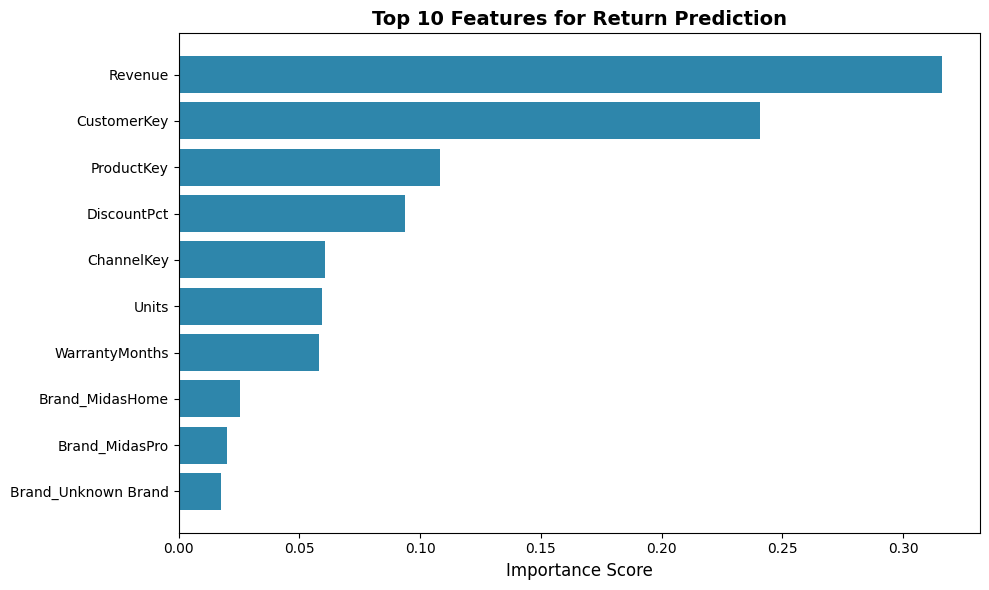


✅ Return Prediction Model Complete!


In [12]:
# =============================================
# 🤖 CELL 11: MACHINE LEARNING - Return Prediction
# =============================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n" + "="*70)
print("🤖 MACHINE LEARNING - RETURN PREDICTION (Random Forest Classifier)")
print("="*70)

# Prepare data for return prediction
ml_data = pd.read_sql("""
    SELECT
        CAST(f.Units AS FLOAT) as Units,
        CAST(f.DiscountPct AS FLOAT) as DiscountPct,
        CAST(f.Revenue AS FLOAT) as Revenue,
        f.ProductKey,
        f.ChannelKey,
        f.CustomerKey,
        CAST(f.ReturnedFlag AS INT) as ReturnedFlag,
        p.Brand,
        CAST(p.WarrantyMonths AS INT) as WarrantyMonths
    FROM fact_sales f
    JOIN dim_product p ON f.ProductKey = p.ProductKey
""", conn)

print(f"📊 Dataset: {len(ml_data)} transactions")
print(f"📊 Return Rate: {ml_data['ReturnedFlag'].mean():.2%}")

# Convert categorical variables to numeric
ml_data_encoded = pd.get_dummies(ml_data, columns=['Brand'], drop_first=True)

# Features and target
X = ml_data_encoded.drop('ReturnedFlag', axis=1)
y = ml_data_encoded['ReturnedFlag']

# Split data (stratify to maintain return rate in both sets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n📊 Training Set: {len(X_train)} samples")
print(f"📊 Test Set: {len(X_test)} samples")

# Train Random Forest Classifier
print("\n🔧 Training Random Forest model...")
rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n✅ MODEL PERFORMANCE:")
print(f"   • Accuracy: {accuracy:.2%}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\n📊 Confusion Matrix:")
print(f"   True Negatives (Correctly predicted non-returns): {cm[0,0]}")
print(f"   False Positives (Incorrectly predicted returns): {cm[0,1]}")
print(f"   False Negatives (Missed returns): {cm[1,0]}")
print(f"   True Positives (Correctly predicted returns): {cm[1,1]}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n🔍 TOP 5 FEATURES FOR RETURN PREDICTION:")
for i, row in feature_importance.head(5).iterrows():
    print(f"   • {row['feature']}: {row['importance']:.3f}")

# Visualize feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
plt.barh(top_features['feature'], top_features['importance'], color='#2E86AB')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 10 Features for Return Prediction', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n✅ Return Prediction Model Complete!")


🤖 MACHINE LEARNING - REVENUE PREDICTION (Random Forest Regressor)
📊 Training Set: 400 samples
📊 Test Set: 100 samples

🔧 Training Random Forest regressor...

✅ MODEL PERFORMANCE:
   • R² Score: 41.21%
   • Mean Absolute Error: $342.88
   • Root Mean Squared Error: $446.04

💡 R² Score Interpretation:
   The model explains 41.2% of revenue variation


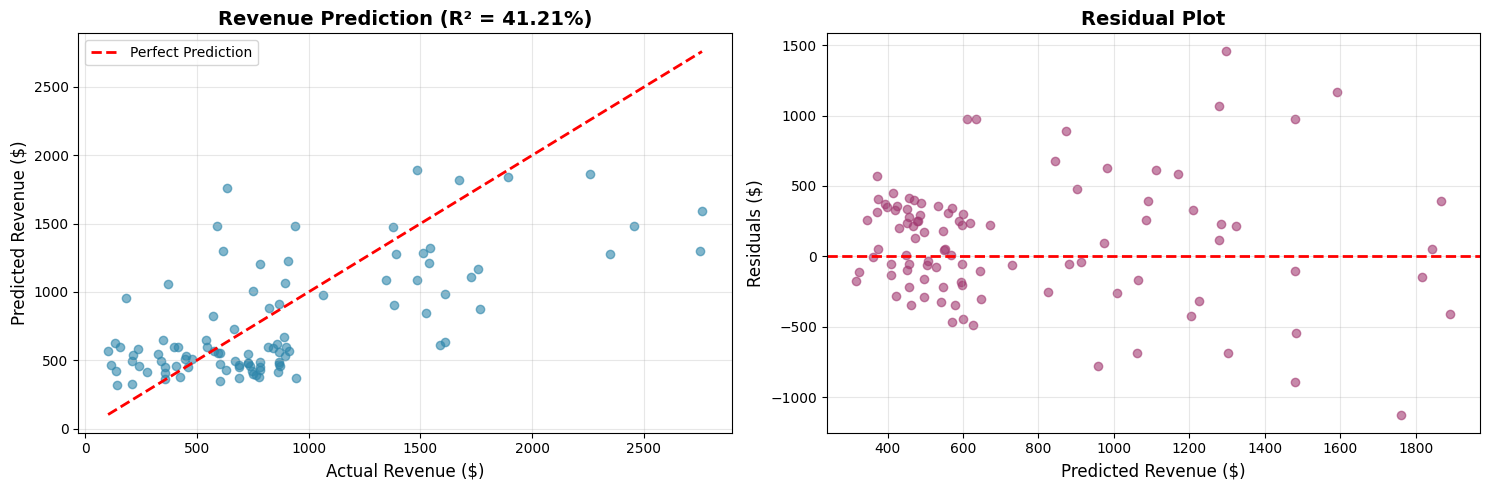


✅ Revenue Prediction Model Complete!


In [13]:
# =============================================
# 🤖 CELL 12: MACHINE LEARNING - Revenue Prediction
# =============================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("\n" + "="*70)
print("🤖 MACHINE LEARNING - REVENUE PREDICTION (Random Forest Regressor)")
print("="*70)

# Prepare data for revenue prediction (reuse ml_data_encoded from previous cell)
X_reg = ml_data_encoded.drop(['Revenue', 'ReturnedFlag'], axis=1)
y_reg = ml_data_encoded['Revenue']

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"📊 Training Set: {len(X_train_reg)} samples")
print(f"📊 Test Set: {len(X_test_reg)} samples")

# Train Random Forest Regressor
print("\n🔧 Training Random Forest regressor...")
rf_regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42
)
rf_regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = rf_regressor.predict(X_test_reg)

# Calculate metrics
r2 = r2_score(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))

print(f"\n✅ MODEL PERFORMANCE:")
print(f"   • R² Score: {r2:.2%}")
print(f"   • Mean Absolute Error: ${mae:.2f}")
print(f"   • Root Mean Squared Error: ${rmse:.2f}")
print(f"\n💡 R² Score Interpretation:")
print(f"   The model explains {r2:.1%} of revenue variation")

# Visualize predictions vs actual
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot: Actual vs Predicted
axes[0].scatter(y_test_reg, y_pred_reg, alpha=0.6, color='#2E86AB')
axes[0].plot([y_test_reg.min(), y_test_reg.max()],
             [y_test_reg.min(), y_test_reg.max()],
             'r--', lw=2, label='Perfect Prediction')
axes[0].set_xlabel('Actual Revenue ($)', fontsize=12)
axes[0].set_ylabel('Predicted Revenue ($)', fontsize=12)
axes[0].set_title(f'Revenue Prediction (R² = {r2:.2%})', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Residual plot
residuals = y_test_reg - y_pred_reg
axes[1].scatter(y_pred_reg, residuals, alpha=0.6, color='#A23B72')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Revenue ($)', fontsize=12)
axes[1].set_ylabel('Residuals ($)', fontsize=12)
axes[1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Revenue Prediction Model Complete!")


🚨 ANOMALY DETECTION - Identifying Unusual Transactions
📊 Analyzing 500 transactions for anomalies...

🔍 DETECTION RESULTS:
   ✅ Normal Transactions: 475
   🚨 Anomalous Transactions: 25
   📊 Anomaly Rate: 5.00%

🚨 TOP 10 MOST UNUSUAL TRANSACTIONS:
 SalesID  Revenue  Units  DiscountPct        CustomerName        ProductName  ReturnedFlag
     437  2988.24      3          0.0 Unknown Customer 49 Unknown Product 11             0
     319  2985.37      3          0.0       Bilal Hussain Unknown Product 11             0
     341  2949.35      3          0.0 Unknown Customer 41   Home Theater 5.1             0
      86  2545.95      3         10.0 Unknown Customer 49 Unknown Product 12             0
     162  2232.70      3         15.0 Unknown Customer 49 Unknown Product 11             0
     151  2178.56      3         15.0 Unknown Customer 30 Unknown Product 12             0
     454  2211.59      3         15.0 Unknown Customer 38 Unknown Product 12             0
     259  2081.65      3

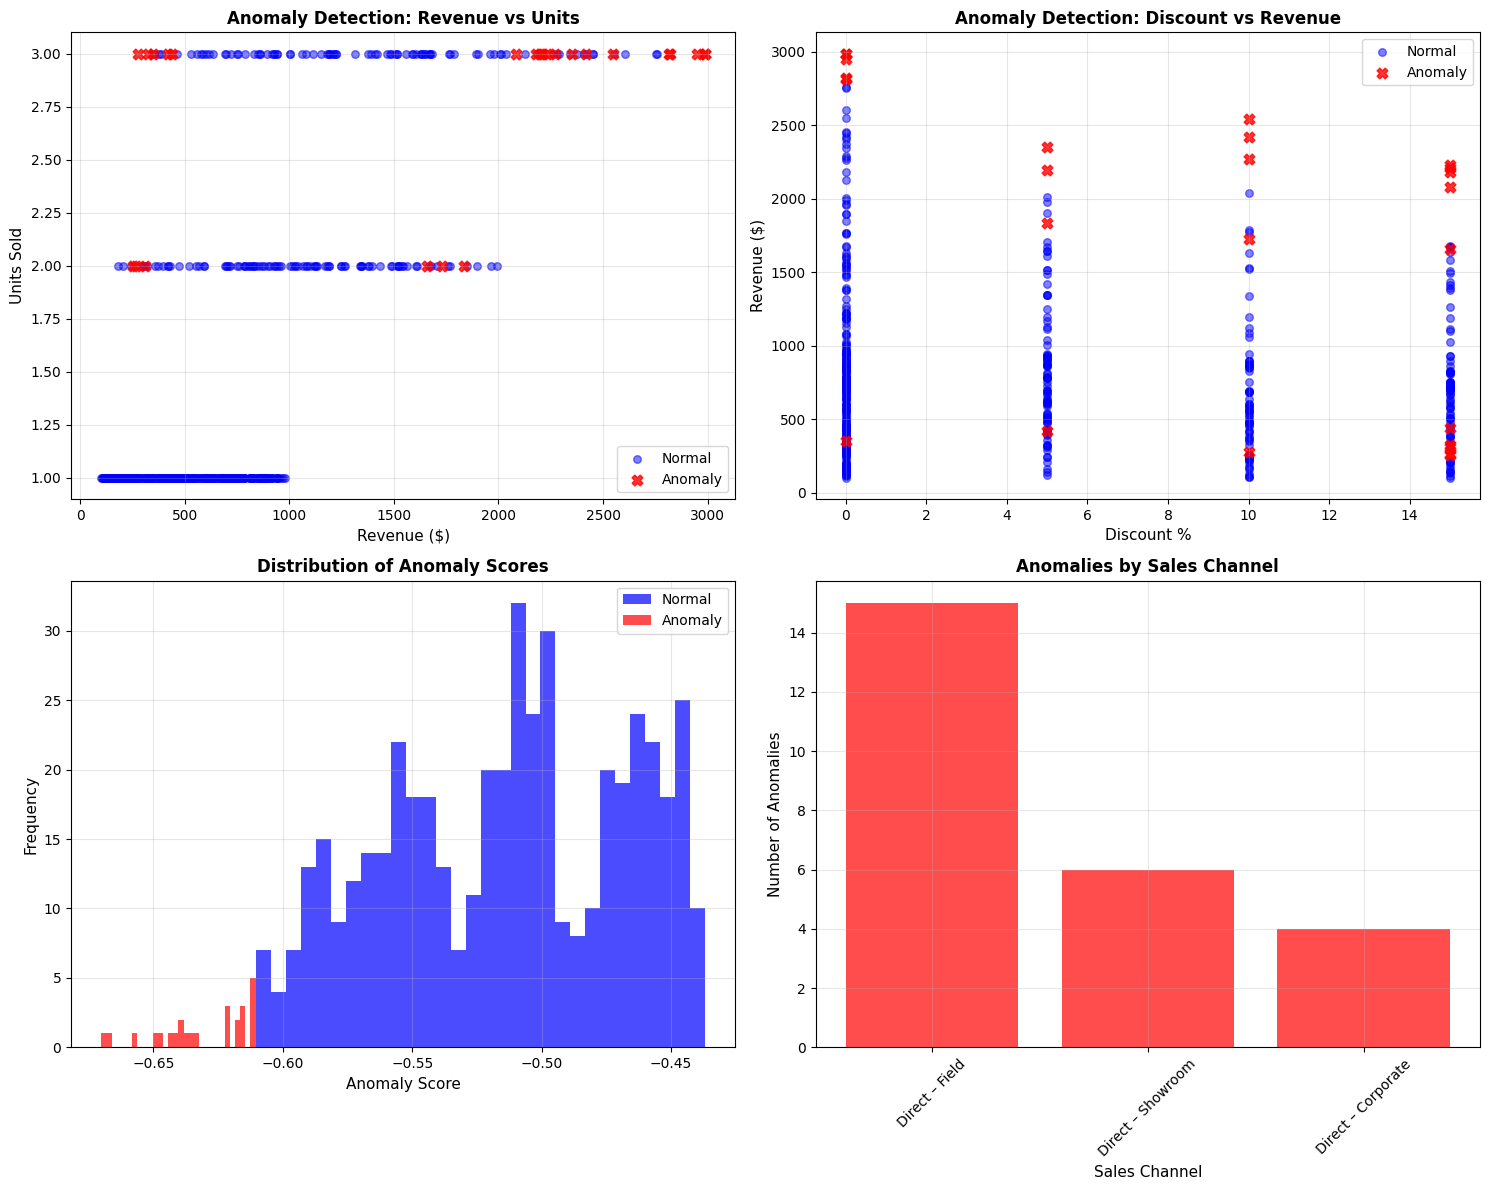


✅ Anomaly Detection Complete!
💡 Recommendation: Investigate high-value anomalies for potential fraud or errors


In [14]:
# =============================================
# 🚨 CELL 13: ANOMALY DETECTION (Isolation Forest)
# =============================================
from sklearn.ensemble import IsolationForest

print("\n" + "="*70)
print("🚨 ANOMALY DETECTION - Identifying Unusual Transactions")
print("="*70)

# Get transaction data
anomaly_data = pd.read_sql("""
    SELECT
        f.SalesID,
        CAST(f.Revenue AS FLOAT) as Revenue,
        CAST(f.Units AS INT) as Units,
        CAST(f.DiscountPct AS FLOAT) as DiscountPct,
        CAST(f.ReturnedFlag AS INT) as ReturnedFlag,
        p.ProductName,
        p.Brand,
        c.FullName as CustomerName,
        c.City,
        s.ChannelName
    FROM fact_sales f
    JOIN dim_product p ON f.ProductKey = p.ProductKey
    JOIN dim_customer c ON f.CustomerKey = c.CustomerKey
    JOIN dim_sales_channel s ON f.ChannelKey = s.ChannelKey
""", conn)

print(f"📊 Analyzing {len(anomaly_data)} transactions for anomalies...")

# Prepare features for anomaly detection
features_for_anomaly = anomaly_data[['Revenue', 'Units', 'DiscountPct']]

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_anomaly)

# Train Isolation Forest
iso_forest = IsolationForest(
    contamination=0.05,  # Expect 5% anomalies
    random_state=42,
    n_estimators=100
)

# Predict anomalies (-1 = anomaly, 1 = normal)
anomaly_data['Anomaly'] = iso_forest.fit_predict(features_scaled)
anomaly_data['Anomaly_Score'] = iso_forest.score_samples(features_scaled)

# Separate anomalies
anomalies = anomaly_data[anomaly_data['Anomaly'] == -1]
normal = anomaly_data[anomaly_data['Anomaly'] == 1]

print(f"\n🔍 DETECTION RESULTS:")
print(f"   ✅ Normal Transactions: {len(normal)}")
print(f"   🚨 Anomalous Transactions: {len(anomalies)}")
print(f"   📊 Anomaly Rate: {len(anomalies)/len(anomaly_data)*100:.2f}%")

# Display top anomalies
print(f"\n🚨 TOP 10 MOST UNUSUAL TRANSACTIONS:")
print("="*70)
top_anomalies = anomalies.nsmallest(10, 'Anomaly_Score')[
    ['SalesID', 'Revenue', 'Units', 'DiscountPct', 'CustomerName', 'ProductName', 'ReturnedFlag']
]
print(top_anomalies.to_string(index=False))

# Business insights from anomalies
anomaly_return_rate = anomalies['ReturnedFlag'].mean() * 100
normal_return_rate = normal['ReturnedFlag'].mean() * 100

print(f"\n💡 BUSINESS INSIGHTS:")
print(f"   📊 Return Rate Comparison:")
print(f"      • Normal Transactions: {normal_return_rate:.1f}%")
print(f"      • Anomalous Transactions: {anomaly_return_rate:.1f}%")

print(f"\n   📊 Average Transaction Values:")
print(f"      Normal:")
print(f"         • Avg Revenue: ${normal['Revenue'].mean():,.2f}")
print(f"         • Avg Units: {normal['Units'].mean():.1f}")
print(f"         • Avg Discount: {normal['DiscountPct'].mean():.1f}%")
print(f"      Anomalous:")
print(f"         • Avg Revenue: ${anomalies['Revenue'].mean():,.2f}")
print(f"         • Avg Units: {anomalies['Units'].mean():.1f}")
print(f"         • Avg Discount: {anomalies['DiscountPct'].mean():.1f}%")

# Visualize anomalies
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Revenue vs Units
axes[0, 0].scatter(normal['Revenue'], normal['Units'],
                   alpha=0.5, c='blue', s=30, label='Normal')
axes[0, 0].scatter(anomalies['Revenue'], anomalies['Units'],
                   alpha=0.8, c='red', s=60, label='Anomaly', marker='X')
axes[0, 0].set_xlabel('Revenue ($)', fontsize=11)
axes[0, 0].set_ylabel('Units Sold', fontsize=11)
axes[0, 0].set_title('Anomaly Detection: Revenue vs Units', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Discount vs Revenue
axes[0, 1].scatter(normal['DiscountPct'], normal['Revenue'],
                   alpha=0.5, c='blue', s=30, label='Normal')
axes[0, 1].scatter(anomalies['DiscountPct'], anomalies['Revenue'],
                   alpha=0.8, c='red', s=60, label='Anomaly', marker='X')
axes[0, 1].set_xlabel('Discount %', fontsize=11)
axes[0, 1].set_ylabel('Revenue ($)', fontsize=11)
axes[0, 1].set_title('Anomaly Detection: Discount vs Revenue', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Anomaly Score Distribution
axes[1, 0].hist(normal['Anomaly_Score'], bins=30, alpha=0.7, color='blue', label='Normal')
axes[1, 0].hist(anomalies['Anomaly_Score'], bins=30, alpha=0.7, color='red', label='Anomaly')
axes[1, 0].set_xlabel('Anomaly Score', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Distribution of Anomaly Scores', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Anomalies by Channel
anomaly_by_channel = anomalies['ChannelName'].value_counts()
axes[1, 1].bar(anomaly_by_channel.index, anomaly_by_channel.values, color='red', alpha=0.7)
axes[1, 1].set_xlabel('Sales Channel', fontsize=11)
axes[1, 1].set_ylabel('Number of Anomalies', fontsize=11)
axes[1, 1].set_title('Anomalies by Sales Channel', fontweight='bold')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Anomaly Detection Complete!")
print("💡 Recommendation: Investigate high-value anomalies for potential fraud or errors")


📊 CREATING PROFESSIONAL BUSINESS INTELLIGENCE DASHBOARD

📈 Dashboard 1: Executive Summary


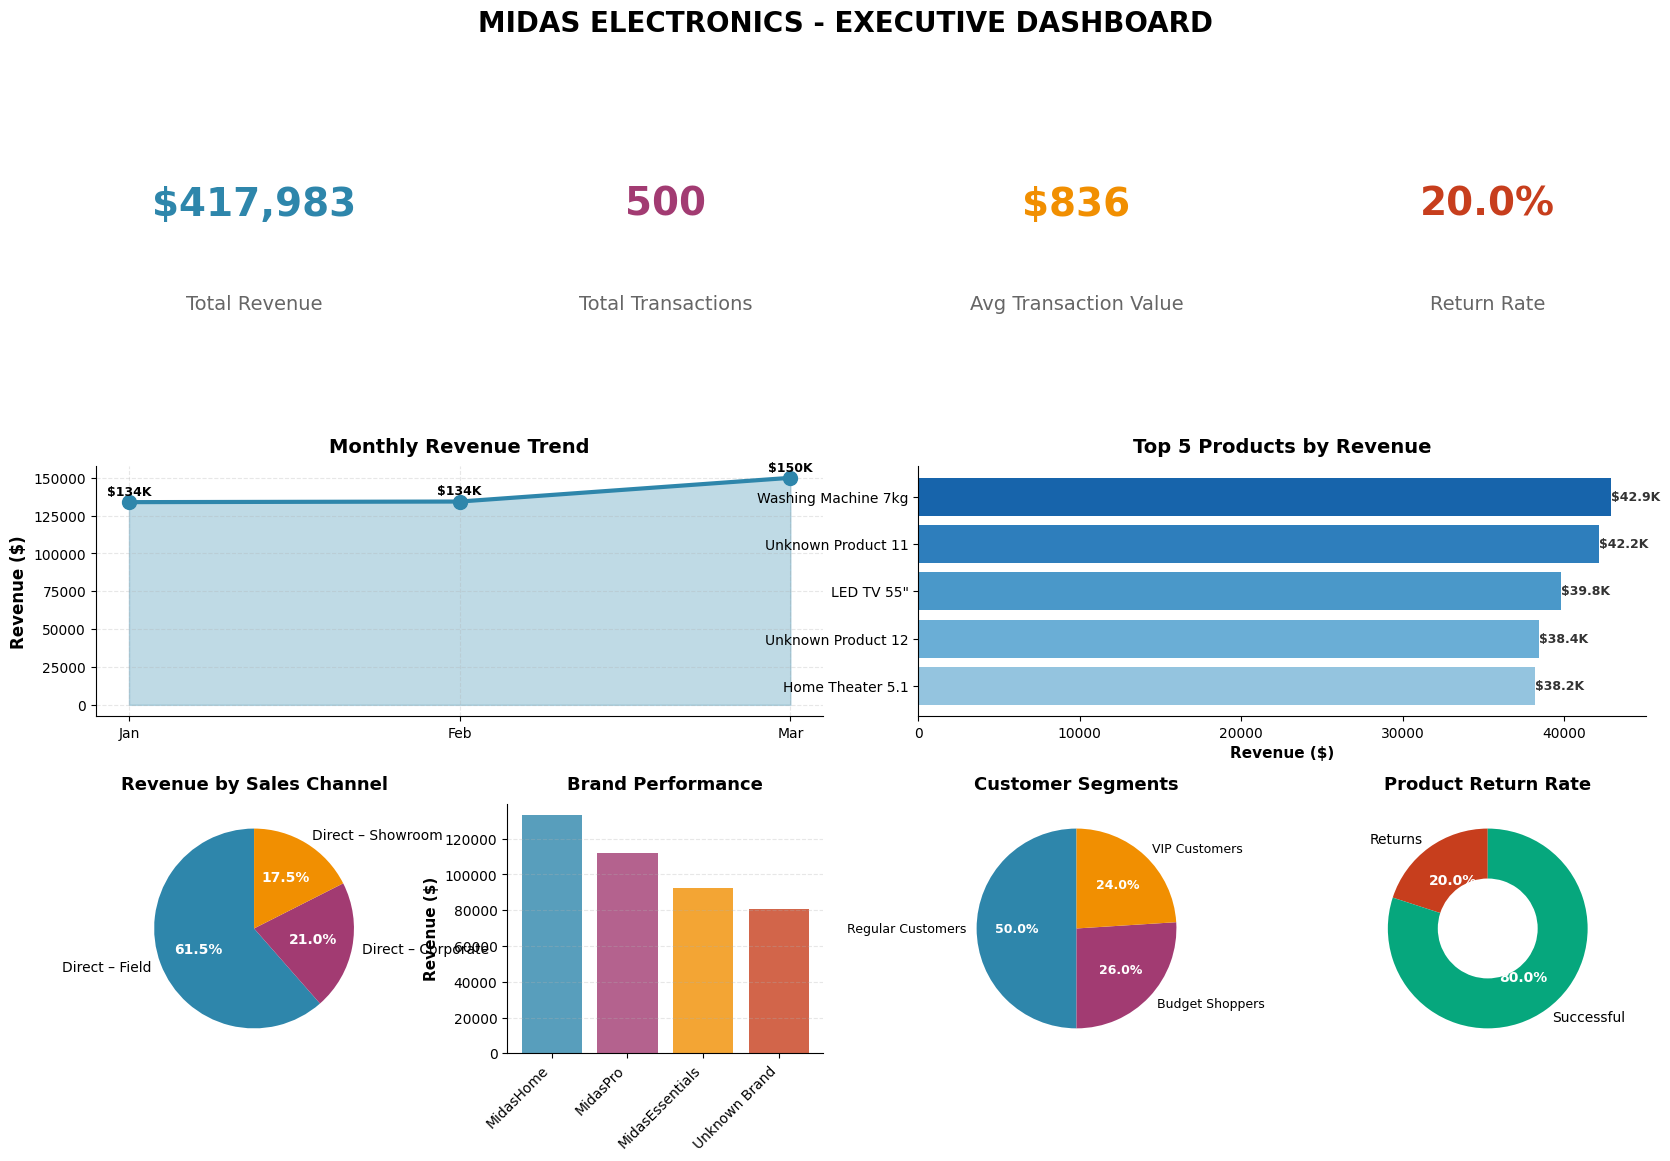

✅ Executive Dashboard created and saved!

📊 Dashboard 2: Sales Performance Analysis


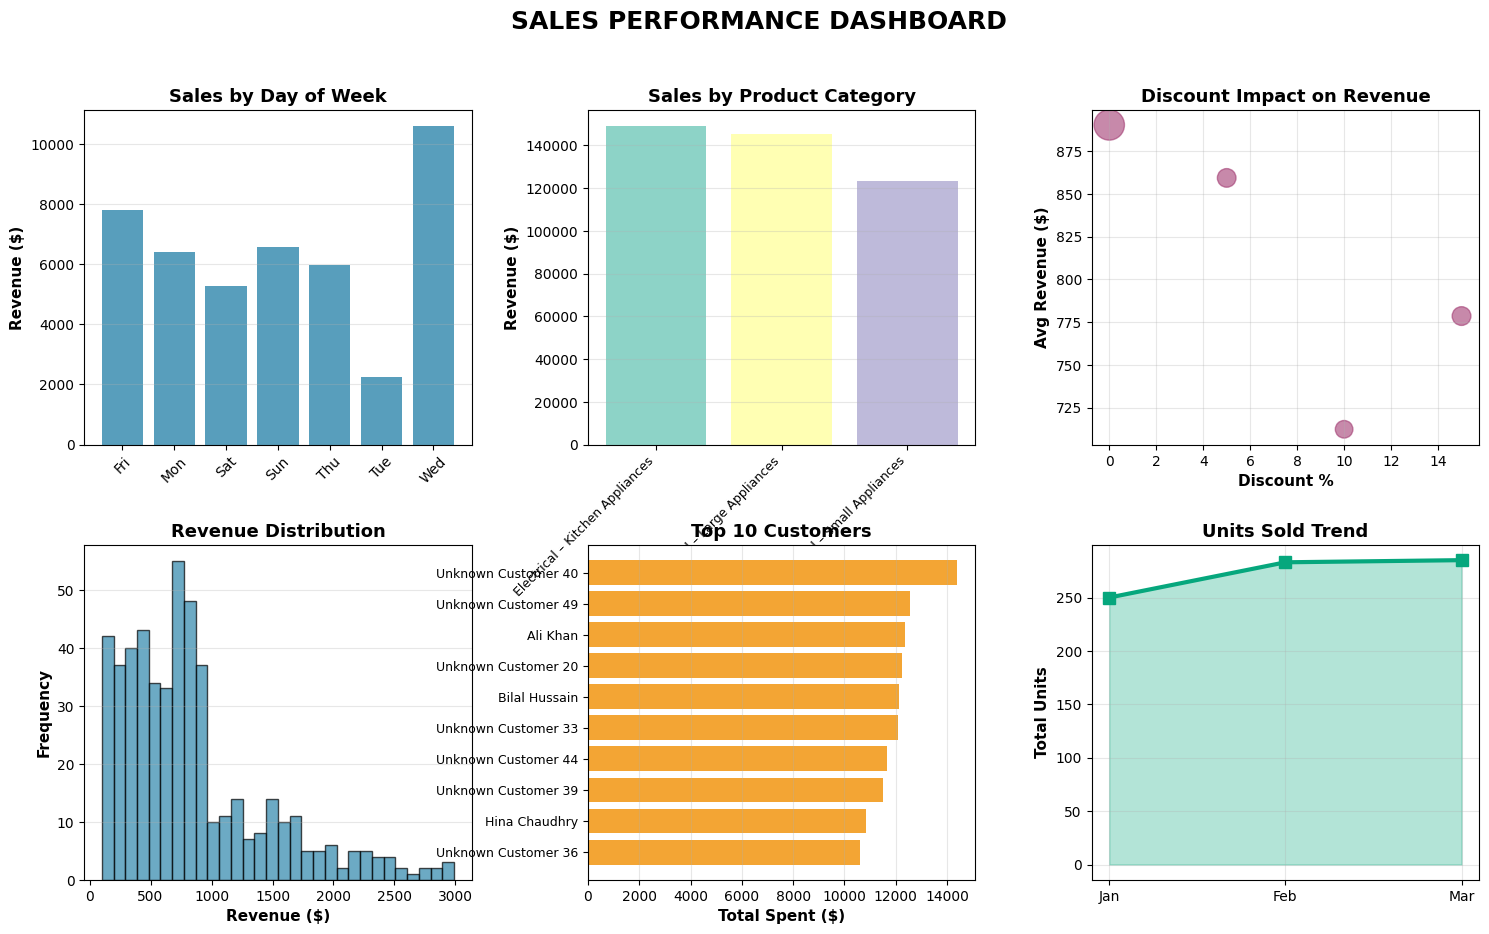

✅ Sales Performance Dashboard created and saved!

🤖 Dashboard 3: Machine Learning Performance


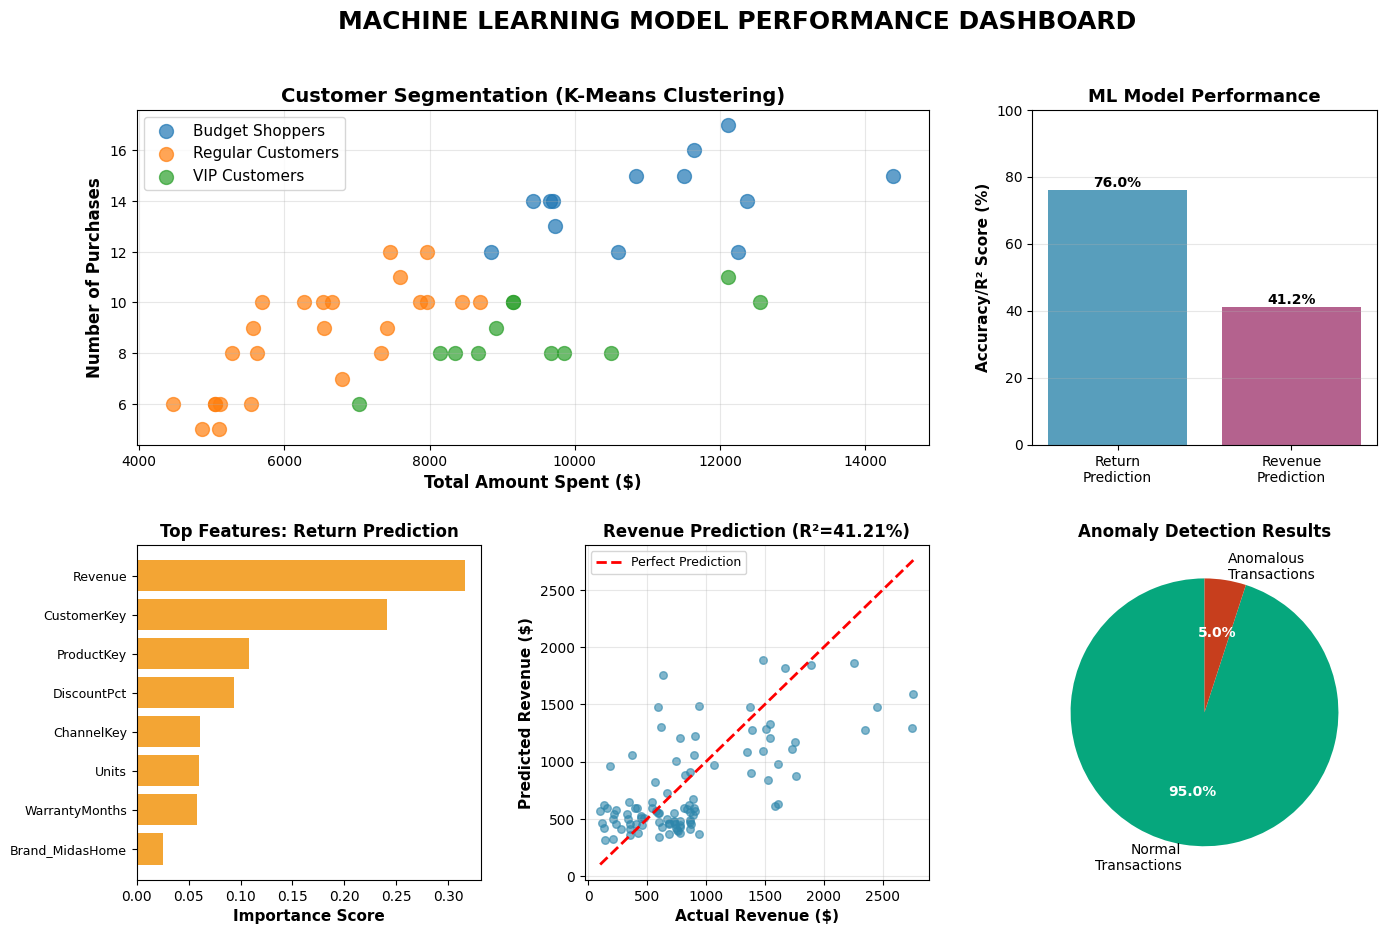

✅ ML Performance Dashboard created and saved!

✅ ALL 3 BI DASHBOARDS CREATED SUCCESSFULLY!

📁 Saved files:
   • executive_dashboard.png
   • sales_performance_dashboard.png
   • ml_performance_dashboard.png

💡 These dashboards cover:
   ✅ Executive KPIs and trends
   ✅ Sales performance analysis
   ✅ ML model performance visualization


In [15]:
# =============================================
# 📊 CELL 14: COMPREHENSIVE BUSINESS INTELLIGENCE DASHBOARD
# =============================================
print("\n" + "="*70)
print("📊 CREATING PROFESSIONAL BUSINESS INTELLIGENCE DASHBOARD")
print("="*70)

# ==========================================
# DASHBOARD 1: EXECUTIVE SUMMARY DASHBOARD
# ==========================================
print("\n📈 Dashboard 1: Executive Summary")

fig = plt.figure(figsize=(20, 12))
fig.suptitle('MIDAS ELECTRONICS - EXECUTIVE DASHBOARD',
             fontsize=20, fontweight='bold', y=0.98)

# Create grid
gs = fig.add_gridspec(3, 4, hspace=0.35, wspace=0.3)

# 1. KEY METRICS (Top Row - KPI Cards)
# Calculate KPIs
total_revenue = monthly_revenue['TotalRevenue'].sum()
total_sales = monthly_revenue['TotalSales'].sum()
avg_transaction = total_revenue / total_sales
best_month = monthly_revenue.loc[monthly_revenue['TotalRevenue'].idxmax()]

# KPI Card 1: Total Revenue
ax_kpi1 = fig.add_subplot(gs[0, 0])
ax_kpi1.text(0.5, 0.7, f'${total_revenue:,.0f}',
             ha='center', va='center', fontsize=28, fontweight='bold', color='#2E86AB')
ax_kpi1.text(0.5, 0.3, 'Total Revenue',
             ha='center', va='center', fontsize=14, color='#666666')
ax_kpi1.set_xlim(0, 1)
ax_kpi1.set_ylim(0, 1)
ax_kpi1.axis('off')
ax_kpi1.set_facecolor('#F0F0F0')

# KPI Card 2: Total Transactions
ax_kpi2 = fig.add_subplot(gs[0, 1])
ax_kpi2.text(0.5, 0.7, f'{total_sales:,}',
             ha='center', va='center', fontsize=28, fontweight='bold', color='#A23B72')
ax_kpi2.text(0.5, 0.3, 'Total Transactions',
             ha='center', va='center', fontsize=14, color='#666666')
ax_kpi2.set_xlim(0, 1)
ax_kpi2.set_ylim(0, 1)
ax_kpi2.axis('off')
ax_kpi2.set_facecolor('#F0F0F0')

# KPI Card 3: Avg Transaction Value
ax_kpi3 = fig.add_subplot(gs[0, 2])
ax_kpi3.text(0.5, 0.7, f'${avg_transaction:,.0f}',
             ha='center', va='center', fontsize=28, fontweight='bold', color='#F18F01')
ax_kpi3.text(0.5, 0.3, 'Avg Transaction Value',
             ha='center', va='center', fontsize=14, color='#666666')
ax_kpi3.set_xlim(0, 1)
ax_kpi3.set_ylim(0, 1)
ax_kpi3.axis('off')
ax_kpi3.set_facecolor('#F0F0F0')

# KPI Card 4: Return Rate
return_rate = return_analysis['ReturnRatePct'].iloc[0]
ax_kpi4 = fig.add_subplot(gs[0, 3])
ax_kpi4.text(0.5, 0.7, f'{return_rate}%',
             ha='center', va='center', fontsize=28, fontweight='bold', color='#C73E1D')
ax_kpi4.text(0.5, 0.3, 'Return Rate',
             ha='center', va='center', fontsize=14, color='#666666')
ax_kpi4.set_xlim(0, 1)
ax_kpi4.set_ylim(0, 1)
ax_kpi4.axis('off')
ax_kpi4.set_facecolor('#F0F0F0')

# 2. Monthly Revenue Trend (Large Chart)
ax1 = fig.add_subplot(gs[1, :2])
ax1.plot(monthly_revenue['MonthName'], monthly_revenue['TotalRevenue'],
         marker='o', linewidth=3, color='#2E86AB', markersize=10, label='Revenue')
ax1.fill_between(range(len(monthly_revenue)), monthly_revenue['TotalRevenue'],
                 alpha=0.3, color='#2E86AB')
for i, (month, rev) in enumerate(zip(monthly_revenue['MonthName'], monthly_revenue['TotalRevenue'])):
    ax1.annotate(f'${rev/1000:.0f}K',
                xy=(i, rev), xytext=(0, 5), textcoords='offset points',
                ha='center', fontsize=9, fontweight='bold')
ax1.set_ylabel('Revenue ($)', fontsize=12, fontweight='bold')
ax1.set_title('Monthly Revenue Trend', fontsize=14, fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.tick_params(axis='x', rotation=0)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# 3. Top 5 Products (Horizontal Bar)
ax2 = fig.add_subplot(gs[1, 2:])
top_5 = top_products.head(5).sort_values('TotalRevenue')
colors_gradient = plt.cm.Blues(np.linspace(0.4, 0.8, len(top_5)))
bars = ax2.barh(top_5['ProductName'], top_5['TotalRevenue'], color=colors_gradient)
ax2.set_xlabel('Revenue ($)', fontsize=11, fontweight='bold')
ax2.set_title('Top 5 Products by Revenue', fontsize=14, fontweight='bold', pad=10)
# Add value labels
for i, (bar, val) in enumerate(zip(bars, top_5['TotalRevenue'])):
    ax2.text(val, bar.get_y() + bar.get_height()/2, f'${val/1000:.1f}K',
            va='center', ha='left', fontsize=9, fontweight='bold', color='#333')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# 4. Channel Performance (Pie Chart)
ax3 = fig.add_subplot(gs[2, 0])
colors_pie = ['#2E86AB', '#A23B72', '#F18F01']
wedges, texts, autotexts = ax3.pie(channel_performance['TotalRevenue'],
                                     labels=channel_performance['ChannelName'],
                                     autopct='%1.1f%%', startangle=90,
                                     colors=colors_pie, textprops={'fontsize': 10})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax3.set_title('Revenue by Sales Channel', fontsize=13, fontweight='bold', pad=10)

# 5. Brand Performance (Bar Chart)
ax4 = fig.add_subplot(gs[2, 1])
colors_brands = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
bars = ax4.bar(range(len(brand_performance)), brand_performance['TotalRevenue'],
               color=colors_brands[:len(brand_performance)], alpha=0.8)
ax4.set_xticks(range(len(brand_performance)))
ax4.set_xticklabels(brand_performance['Brand'], rotation=45, ha='right', fontsize=10)
ax4.set_ylabel('Revenue ($)', fontsize=11, fontweight='bold')
ax4.set_title('Brand Performance', fontsize=13, fontweight='bold', pad=10)
ax4.grid(True, alpha=0.3, axis='y', linestyle='--')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# 6. Customer Segmentation (Pie)
ax5 = fig.add_subplot(gs[2, 2])
colors_segments = ['#2E86AB', '#A23B72', '#F18F01']
wedges, texts, autotexts = ax5.pie(segment_counts.values,
                                     labels=segment_counts.index,
                                     autopct='%1.1f%%', startangle=90,
                                     colors=colors_segments, textprops={'fontsize': 9})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax5.set_title('Customer Segments', fontsize=13, fontweight='bold', pad=10)

# 7. Return Analysis (Donut Chart)
ax6 = fig.add_subplot(gs[2, 3])
return_data = [return_analysis['TotalReturns'].iloc[0],
               return_analysis['TotalSales'].iloc[0] - return_analysis['TotalReturns'].iloc[0]]
colors_return = ['#C73E1D', '#06A77D']
wedges, texts, autotexts = ax6.pie(return_data, labels=['Returns', 'Successful'],
                                     autopct='%1.1f%%', colors=colors_return,
                                     startangle=90, textprops={'fontsize': 10},
                                     wedgeprops=dict(width=0.5))
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax6.set_title('Product Return Rate', fontsize=13, fontweight='bold', pad=10)

plt.savefig('executive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Executive Dashboard created and saved!")

# ==========================================
# DASHBOARD 2: SALES PERFORMANCE DASHBOARD
# ==========================================
print("\n📊 Dashboard 2: Sales Performance Analysis")

fig2 = plt.figure(figsize=(18, 10))
fig2.suptitle('SALES PERFORMANCE DASHBOARD', fontsize=18, fontweight='bold', y=0.98)

gs2 = fig2.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Sales by Day of Week
sales_by_day = pd.read_sql("""
    SELECT
        d.DayOfWeek,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue,
        COUNT(f.SalesID) as TotalSales
    FROM fact_sales f
    JOIN dim_date d ON f.DateKey = d.DateKey
    WHERE d.DayOfWeek != 'Unknown'
    GROUP BY d.DayOfWeek
""", conn)

if len(sales_by_day) > 0:
    ax1 = fig2.add_subplot(gs2[0, 0])
    ax1.bar(sales_by_day['DayOfWeek'], sales_by_day['TotalRevenue'],
            color='#2E86AB', alpha=0.8)
    ax1.set_ylabel('Revenue ($)', fontsize=11, fontweight='bold')
    ax1.set_title('Sales by Day of Week', fontsize=13, fontweight='bold')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3, axis='y')

# 2. Sales by Product Category
category_sales = pd.read_sql("""
    SELECT
        pg.ProductGroupName,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalRevenue
    FROM fact_sales f
    JOIN dim_product_group pg ON f.ProductGroupKey = pg.ProductGroupKey
    GROUP BY pg.ProductGroupName
    ORDER BY TotalRevenue DESC
""", conn)

ax2 = fig2.add_subplot(gs2[0, 1])
colors_cat = plt.cm.Set3(range(len(category_sales)))
ax2.bar(range(len(category_sales)), category_sales['TotalRevenue'], color=colors_cat)
ax2.set_xticks(range(len(category_sales)))
ax2.set_xticklabels(category_sales['ProductGroupName'], rotation=45, ha='right', fontsize=9)
ax2.set_ylabel('Revenue ($)', fontsize=11, fontweight='bold')
ax2.set_title('Sales by Product Category', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Discount Impact Analysis
discount_analysis = pd.read_sql("""
    SELECT
        CAST(f.DiscountPct AS INT) as DiscountBucket,
        AVG(CAST(f.Revenue AS FLOAT)) as AvgRevenue,
        COUNT(f.SalesID) as TotalSales
    FROM fact_sales f
    GROUP BY CAST(f.DiscountPct AS INT)
    ORDER BY DiscountBucket
""", conn)

ax3 = fig2.add_subplot(gs2[0, 2])
ax3.scatter(discount_analysis['DiscountBucket'], discount_analysis['AvgRevenue'],
           s=discount_analysis['TotalSales']*2, alpha=0.6, color='#A23B72')
ax3.set_xlabel('Discount %', fontsize=11, fontweight='bold')
ax3.set_ylabel('Avg Revenue ($)', fontsize=11, fontweight='bold')
ax3.set_title('Discount Impact on Revenue', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Revenue Distribution (Histogram)
all_revenues = pd.read_sql("SELECT CAST(Revenue AS FLOAT) as Revenue FROM fact_sales", conn)
ax4 = fig2.add_subplot(gs2[1, 0])
ax4.hist(all_revenues['Revenue'], bins=30, color='#2E86AB', alpha=0.7, edgecolor='black')
ax4.set_xlabel('Revenue ($)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Frequency', fontsize=11, fontweight='bold')
ax4.set_title('Revenue Distribution', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3, axis='y')

# 5. Top 10 Customers
top_customers = pd.read_sql("""
    SELECT
        c.FullName,
        SUM(CAST(f.Revenue AS FLOAT)) as TotalSpent
    FROM fact_sales f
    JOIN dim_customer c ON f.CustomerKey = c.CustomerKey
    WHERE c.FullName != 'Unknown'
    GROUP BY c.FullName
    ORDER BY TotalSpent DESC
    LIMIT 10
""", conn)

if len(top_customers) > 0:
    ax5 = fig2.add_subplot(gs2[1, 1])
    top_customers_sorted = top_customers.sort_values('TotalSpent')
    ax5.barh(range(len(top_customers_sorted)), top_customers_sorted['TotalSpent'],
             color='#F18F01', alpha=0.8)
    ax5.set_yticks(range(len(top_customers_sorted)))
    ax5.set_yticklabels(top_customers_sorted['FullName'], fontsize=9)
    ax5.set_xlabel('Total Spent ($)', fontsize=11, fontweight='bold')
    ax5.set_title('Top 10 Customers', fontsize=13, fontweight='bold')
    ax5.grid(True, alpha=0.3, axis='x')

# 6. Units Sold Trend
units_by_month = pd.read_sql("""
    SELECT
        d.MonthName,
        d.Month,
        SUM(CAST(f.Units AS INT)) as TotalUnits
    FROM fact_sales f
    JOIN dim_date d ON f.DateKey = d.DateKey
    GROUP BY d.MonthName, d.Month
    ORDER BY d.Month
""", conn)

ax6 = fig2.add_subplot(gs2[1, 2])
ax6.plot(units_by_month['MonthName'], units_by_month['TotalUnits'],
        marker='s', linewidth=3, color='#06A77D', markersize=8)
ax6.fill_between(range(len(units_by_month)), units_by_month['TotalUnits'],
                alpha=0.3, color='#06A77D')
ax6.set_ylabel('Total Units', fontsize=11, fontweight='bold')
ax6.set_title('Units Sold Trend', fontsize=13, fontweight='bold')
ax6.grid(True, alpha=0.3)

plt.savefig('sales_performance_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Sales Performance Dashboard created and saved!")

# ==========================================
# DASHBOARD 3: ML MODEL PERFORMANCE DASHBOARD
# ==========================================
print("\n🤖 Dashboard 3: Machine Learning Performance")

fig3 = plt.figure(figsize=(16, 10))
fig3.suptitle('MACHINE LEARNING MODEL PERFORMANCE DASHBOARD',
              fontsize=18, fontweight='bold', y=0.98)

gs3 = fig3.add_gridspec(2, 3, hspace=0.3, wspace=0.3)

# 1. Customer Segmentation Visualization
ax1 = fig3.add_subplot(gs3[0, :2])
for segment in customer_behavior['SegmentName'].unique():
    segment_data = customer_behavior[customer_behavior['SegmentName'] == segment]
    ax1.scatter(segment_data['TotalSpent'], segment_data['PurchaseCount'],
               label=segment, s=100, alpha=0.7)
ax1.set_xlabel('Total Amount Spent ($)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Number of Purchases', fontsize=12, fontweight='bold')
ax1.set_title('Customer Segmentation (K-Means Clustering)', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)

# 2. Model Accuracy Comparison
ax2 = fig3.add_subplot(gs3[0, 2])
models = ['Return\nPrediction', 'Revenue\nPrediction']
scores = [accuracy*100, r2*100]
colors_models = ['#2E86AB', '#A23B72']
bars = ax2.bar(models, scores, color=colors_models, alpha=0.8)
ax2.set_ylabel('Accuracy/R² Score (%)', fontsize=11, fontweight='bold')
ax2.set_title('ML Model Performance', fontsize=13, fontweight='bold')
ax2.set_ylim(0, 100)
# Add value labels
for bar, score in zip(bars, scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.1f}%', ha='center', va='bottom', fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Feature Importance (Return Prediction)
ax3 = fig3.add_subplot(gs3[1, 0])
top_features = feature_importance.head(8).sort_values('importance')
ax3.barh(top_features['feature'], top_features['importance'], color='#F18F01', alpha=0.8)
ax3.set_xlabel('Importance Score', fontsize=11, fontweight='bold')
ax3.set_title('Top Features: Return Prediction', fontsize=12, fontweight='bold')
ax3.tick_params(axis='y', labelsize=9)

# 4. Actual vs Predicted Revenue
ax4 = fig3.add_subplot(gs3[1, 1])
ax4.scatter(y_test_reg, y_pred_reg, alpha=0.6, color='#2E86AB', s=30)
ax4.plot([y_test_reg.min(), y_test_reg.max()],
        [y_test_reg.min(), y_test_reg.max()],
        'r--', lw=2, label='Perfect Prediction')
ax4.set_xlabel('Actual Revenue ($)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Predicted Revenue ($)', fontsize=11, fontweight='bold')
ax4.set_title(f'Revenue Prediction (R²={r2:.2%})', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)

# 5. Anomaly Detection Summary
ax5 = fig3.add_subplot(gs3[1, 2])
anomaly_summary = [len(normal), len(anomalies)]
labels_anom = ['Normal\nTransactions', 'Anomalous\nTransactions']
colors_anom = ['#06A77D', '#C73E1D']
wedges, texts, autotexts = ax5.pie(anomaly_summary, labels=labels_anom,
                                    autopct='%1.1f%%', colors=colors_anom,
                                    startangle=90, textprops={'fontsize': 10})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax5.set_title('Anomaly Detection Results', fontsize=12, fontweight='bold')

plt.savefig('ml_performance_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ ML Performance Dashboard created and saved!")

print("\n" + "="*70)
print("✅ ALL 3 BI DASHBOARDS CREATED SUCCESSFULLY!")
print("="*70)
print("\n📁 Saved files:")
print("   • executive_dashboard.png")
print("   • sales_performance_dashboard.png")
print("   • ml_performance_dashboard.png")
print("\n💡 These dashboards cover:")
print("   ✅ Executive KPIs and trends")
print("   ✅ Sales performance analysis")
print("   ✅ ML model performance visualization")